# Machine Learning Project for Marketing Campaign
## Kelompok 7 : Emergency Code 7

#### Exploratory Data Analysis Team (Data Analyst):

Vito Muhammad

Dean Dwi Mahendra

Widia Nurlina Rahayu

#### Feature Engineering Team (Data Engineer):

Daris Rayhan Handoko

Nurhidayah Tasmin

#### Machine Learning Team:

Muh. Rizki Alim

Sri Devi

* Data yang digunakan di sini adalah data marketing campaign dengan keterangan kolom-kolom data sebagai berikut:

**AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
**AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
**AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
**AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
**AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
**Complain** - 1 if customer complained in the last 2 years<br>
**DtCustomer** - date of customer’s enrolment with the company<br>
**Education** - customer’s level of education<br>
**Marital** - customer’s marital status<br>
**Kidhome** - number of small children in customer’s household<br>
**Teenhome** - number of teenagers in customer’s household<br>
**Income** - customer’s yearly household income<br>
**MntFishProducts** - amount spent on fish products in the last 2 years<br>
**MntMeatProducts** - amount spent on meat products in the last 2 years<br>
**MntFruits** - amount spent on fruits products in the last 2 years<br>
**MntSweetProducts** - amount spent on sweet products in the last 2 years<br>
**MntWines** - amount spent on wine products in the last 2 years<br>
**MntGoldProds** - amount spent on gold products in the last 2 years<br>
**NumDealsPurchases** - number of purchases made with discount<br>
**NumCatalogPurchases** - number of purchases made using catalogue<br>
**NumStorePurchases** - number of purchases made directly in stores<br>
**umWebPurchases** - number of purchases made through company’s web site<br>
**NumWebVisitsMonth** - number of visits to company’s web site in the last month<br>
**Recency** - number of days since the last purchase<br>

## EXPLORATORY DATA ANALYSIS (EDA) (STAGE 1)

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [107]:
df = pd.read_excel('marketing_campaign.xlsx')

In [108]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [109]:
### Menambah kolom tanggal acuan data dikumpulkan
df['Observed_Time'] = '2015-02-02'
df['Observed_Time'] = pd.to_datetime(df['Observed_Time'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [110]:
### Membuat kolom umur dari data Year_Birth agar lebih mudah dipahami
df['Umur'] = 2015 - df['Year_Birth']

In [111]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Observed_Time  Umur  
0              3         11         1    2015-02-02    58  
1              3         11         0    2015-02-02    61  
2              3         11         0    2015-02-02    50  
3              3         11         0    2015-02-02    31  
4              3         11         0    2015-02-02    34

In [112]:
## Mengkelompokkan kategori customer kedalam segmentasi berdasarkan kelahiran

kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('Pre-boomer')
    elif df['Year_Birth'][i]<=1946 or df['Year_Birth'][i]<=1964 :
        kel.append('Baby boomers')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980 :
        kel.append('Generasi X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996 :
        kel.append('Generasi Y')
    else:
        kel.append('Generasi Z')
        
df['Kelompok_Usia'] = kel
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Observed_Time  Umur Kelompok_Usia  
0              3         11         1    2015-02-02    58  Baby boomers  
1              3         11         0    2015-02-02    61  Baby boomers  
2              3         11         0    2015-02-02    50    Generasi X  
3              3         11         0    2015-02-02    31    Generasi Y  
4              3         11         0    2015-02-02    34    Generasi Y

In [113]:
#Check Duplicate
print(df.shape)

print('Jumlah kolom yang terduplikasi :', df.duplicated().sum())

(2240, 32)
Jumlah kolom yang terduplikasi : 0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* #### 1. Berdasarkan summary info diatas maka kita mempunyai 3 kelompok kategorikal
* #### 2. Hanya kolom Income yang memiliki nilai missing value
* #### 3. Tidak ada data yang terduplikasi

In [115]:
#missing Value
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Observed_Time           0
Umur                    0
Kelompok_Usia           0
dtype: int64


In [116]:
a = (24/2240)*100
print ("jumlah mising value pada kolom income yaitu sebesar", a, "%")

jumlah mising value pada kolom income yaitu sebesar 1.0714285714285714 %


In [117]:
### Kolom ID dapat diabaikan

numericals = ['Year_Birth','Income','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','Complain','Z_CostContact','Z_Revenue','Response','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','Umur']
categoricals = ['Education','Marital_Status','kelompok_usia']
other = ['Complain', 'Z_CostContact', 'Z_Revenue']

belanja = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
jenispembelian= ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
accepted_campaign = ['AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4']
target_variable = ['Response']

In [118]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Umur                 2240.0     46.194196     11.984069    19.0     38.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0  
Umur                    45.0     56.00     122.0

In [119]:
#sns.pairplot(data=df, x_vars=['Income', 'Umur', 'Recency'], y_vars=['Income', 'Umur', 'Recency'],  hue='Response')

In [120]:
## BIKIN BOXPLOT SEBARAN DATA

In [121]:
### daftar fungsi visualisasi

def visual_histplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.histplot(df[col],kde=True)
    plt.title('Distribusi data ' + col)
    plt.show()
    
def visual_boxplot(col):
    plt.figure(figsize=(6,4), dpi=100)
    sns.boxplot(df[col])
    plt.title('Distribusi data '+ col +' dalam bentuk Boxplot')
    plt.show()
    
def visual_countplot(col, hue=None):
    plt.figure(figsize=(6,4), dpi=100)
    sns.countplot(data=df, x=col, hue=hue)
    plt.title('Distribusi data ' + col)
    plt.show()

## Visualize the Data for Univariate Analysis

### INCOME

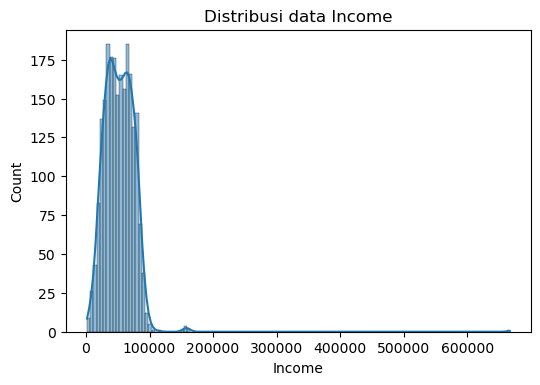

In [122]:
visual_histplot('Income')

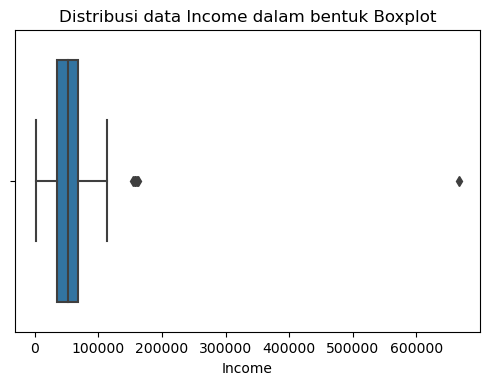

In [123]:
visual_boxplot('Income')

In [124]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### UMUR

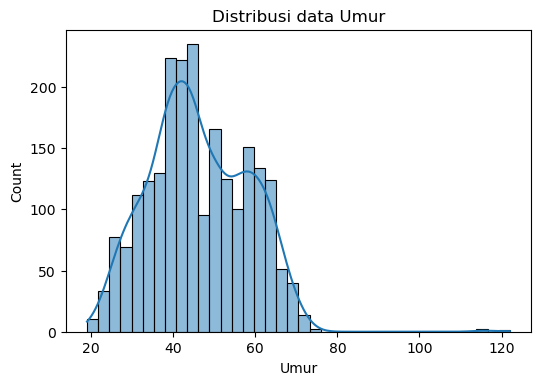

In [125]:
visual_histplot('Umur')

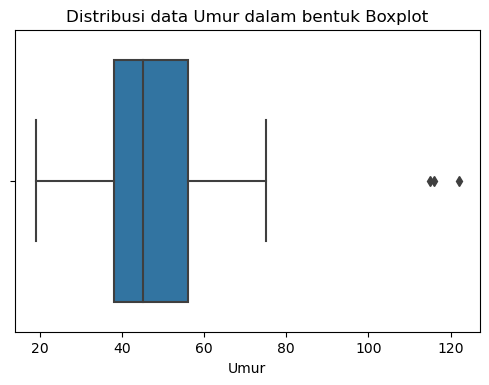

In [126]:
visual_boxplot('Umur')

In [127]:
df['Umur'].describe()

count    2240.000000
mean       46.194196
std        11.984069
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Umur, dtype: float64

### Education

In [128]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

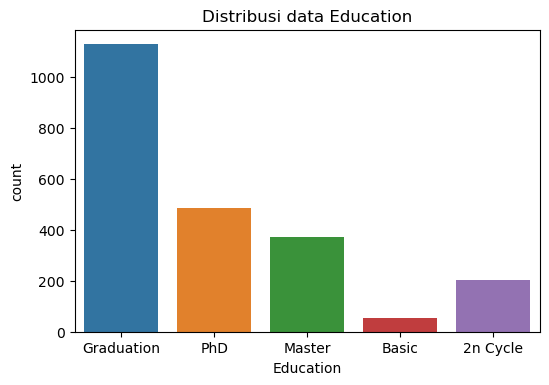

In [129]:
visual_countplot('Education')

## Marital Status

In [130]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

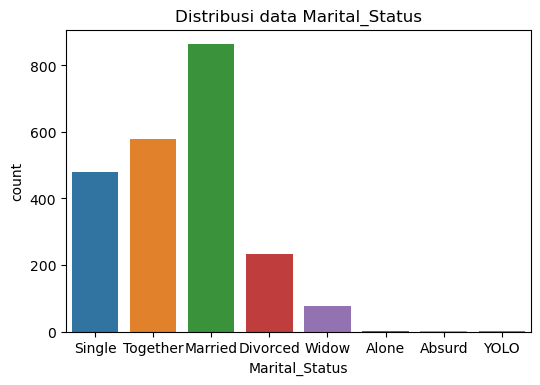

In [131]:
visual_countplot('Marital_Status')

## Recency

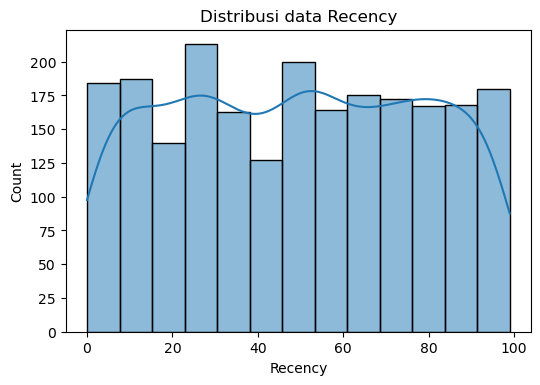

In [132]:
visual_histplot('Recency')

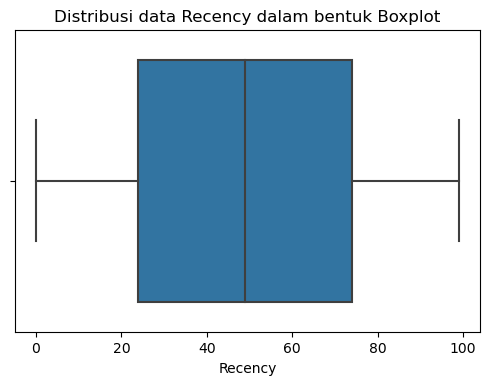

In [133]:
visual_boxplot('Recency')

In [134]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

## Visualize the Data for Multivariate Analysis

* ### Visualisasi Target Variabel ( Kolom Response)

0    1895
1     334
Name: Response, dtype: int64

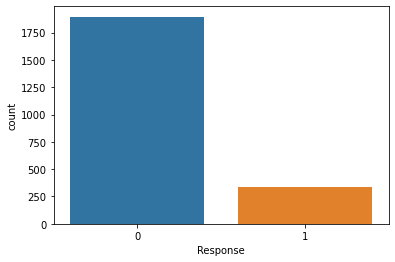

In [349]:
## Visualisasi target variable (y) yaitu pada kolom response

sns.countplot(data=df, x=df['Response'])
df['Response'].value_counts()

In [136]:
df_response = pd.DataFrame(df[['Response']].value_counts())
df_response.columns = ['Response Rate']
df_response = df_response.reset_index()

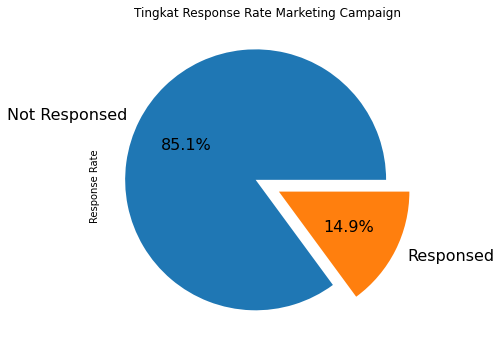

In [137]:
df_response.plot(y='Response Rate',kind='pie', 
                 explode=[0.1,0.1], labels=[ 'Not Responsed','Responsed'], autopct='%1.1f%%',
                legend=False, figsize=(6,6), title = 'Tingkat Response Rate Marketing Campaign',
                fontsize=16);

In [138]:
print('Tingkat keberhasilan (Response Rate) campaign terakhir adalah sebesar : '+ str(np.mean(df.Response==1) * 100) + ' %')

Tingkat keberhasilan (Response Rate) campaign terakhir adalah sebesar : 14.910714285714285 %


* ### Hubungan Recency dengan Response

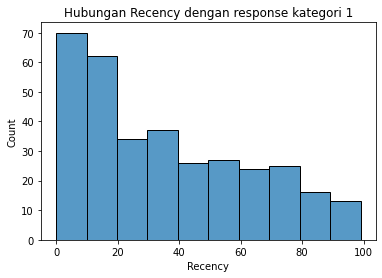

In [139]:
sns.histplot(x=df.Recency[df.Response==1])
sns.color_palette('magma')
plt.title('Hubungan Recency dengan response kategori 1');

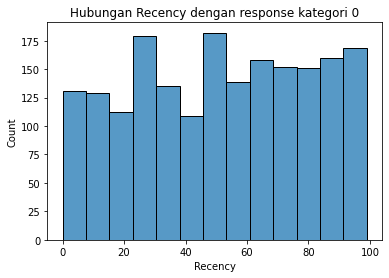

In [140]:
sns.histplot(x=df.Recency[df.Response==0], palette='Set1')
plt.title('Hubungan Recency dengan response kategori 0');

* Berdasarkan tabel diatas seseorang yang memiliki recency lebih rendah lebih cenderung untuk menerima Response campaign marketing (**Hal ini dilihat dari sebaran recency pada kategori 1 didominasi customer dengan recency yang rendah**). Sedangkan sebaran recency pada kategori Response 0 tidak dapat diketahui hubungannya

* ### Hubungan atau History Campaign Sebelumnya dengan Campaign Terakhir (Response)

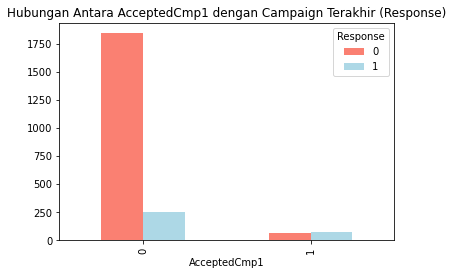

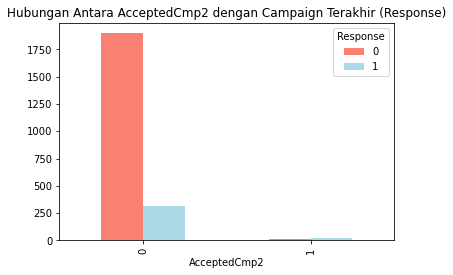

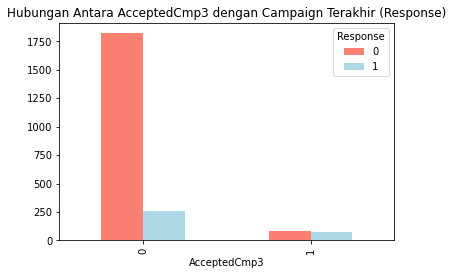

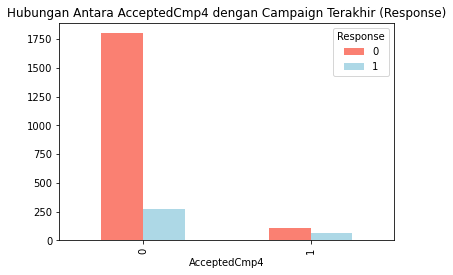

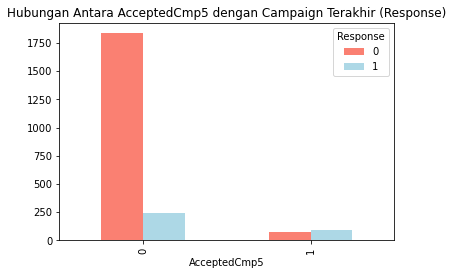

In [141]:
kolom = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

for col in kolom :
    pd.crosstab(df[col], df.Response).plot( kind ='bar', 
                                                    figsize=(6,4),
                                                    color = ['salmon','lightblue'])
    plt.title('Hubungan Antara '+ col + ' dengan Campaign Terakhir (Response)')

* Jika dilihat dari hubungan grafik diatas maka history campaign pertama hingga kelima terhadap response terhitung baik dimana awalnya ketika customer pada campaign sebelumnya tidak meresponse( response kategori 0), kemudian berubah pada campaign terakhir meresponse ( kategori response menjadi 1). Sedangkan jumlah campaign pertama hingga kelima yang awalnya meresponse campaign atau terkategori 1 yang kemudian tidak meresponse campaign terakhir atau menjadi kategori 0 pada response, jumlahnya lebih sedikit.

In [142]:
data1 = pd.crosstab(df['AcceptedCmp1'], df['Response'])
data1

Response         0    1
AcceptedCmp1           
0             1841  255
1               65   79

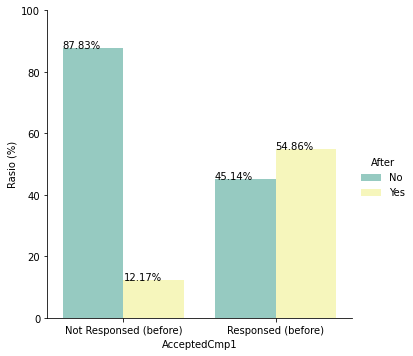

In [143]:
df1 = df.groupby('AcceptedCmp1')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Rasio (%)').reset_index()

g = sns.catplot(x='AcceptedCmp1',y='Rasio (%)',hue='Response',kind='bar',data=df1, palette='Set3')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Not Responsed (before)', 'Responsed (before)'])

new_title = 'After'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [144]:
pd.crosstab(df['AcceptedCmp2'], df['Response'])

Response         0    1
AcceptedCmp2           
0             1896  314
1               10   20

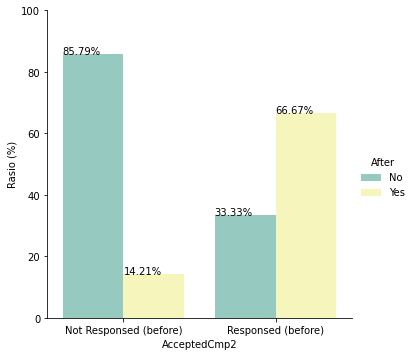

In [145]:
df1 = df.groupby('AcceptedCmp2')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Rasio (%)').reset_index()

g = sns.catplot(x='AcceptedCmp2',y='Rasio (%)',hue='Response',kind='bar',data=df1, palette='Set3')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Not Responsed (before)', 'Responsed (before)'])

new_title = 'After'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [146]:
pd.crosstab(df['AcceptedCmp3'], df['Response'])

Response         0    1
AcceptedCmp3           
0             1820  257
1               86   77

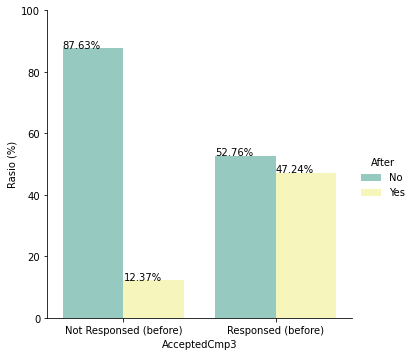

In [147]:
df1 = df.groupby('AcceptedCmp3')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Rasio (%)').reset_index()

g = sns.catplot(x='AcceptedCmp3',y='Rasio (%)',hue='Response',kind='bar',data=df1, palette='Set3')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Not Responsed (before)', 'Responsed (before)'])

new_title = 'After'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [148]:
pd.crosstab(df['AcceptedCmp4'], df['Response'])

Response         0    1
AcceptedCmp4           
0             1801  272
1              105   62

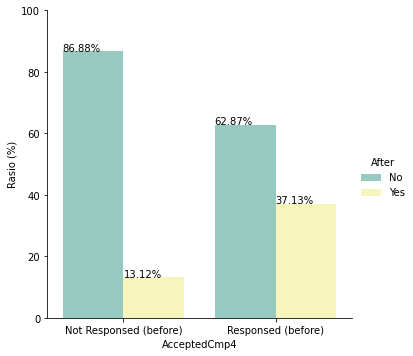

In [149]:
df1 = df.groupby('AcceptedCmp4')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Rasio (%)').reset_index()

g = sns.catplot(x='AcceptedCmp4',y='Rasio (%)',hue='Response',kind='bar',data=df1, palette='Set3')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Not Responsed (before)', 'Responsed (before)'])

new_title = 'After'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [150]:
pd.crosstab(df['AcceptedCmp5'], df['Response'])

Response         0    1
AcceptedCmp5           
0             1835  242
1               71   92

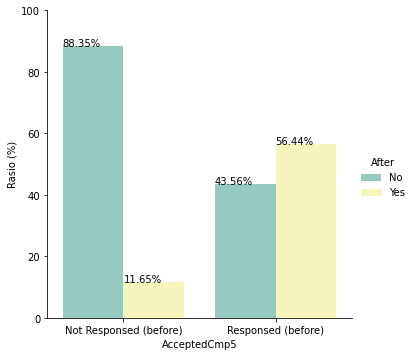

In [151]:
df1 = df.groupby('AcceptedCmp5')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Rasio (%)').reset_index()

g = sns.catplot(x='AcceptedCmp5',y='Rasio (%)',hue='Response',kind='bar',data=df1, palette='Set3')
g.ax.set_ylim(0,100)
g.set_xticklabels(['Not Responsed (before)', 'Responsed (before)'])

new_title = 'After'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

** note dibuat percentage perubahan

<AxesSubplot:xlabel='Education', ylabel='Umur'>

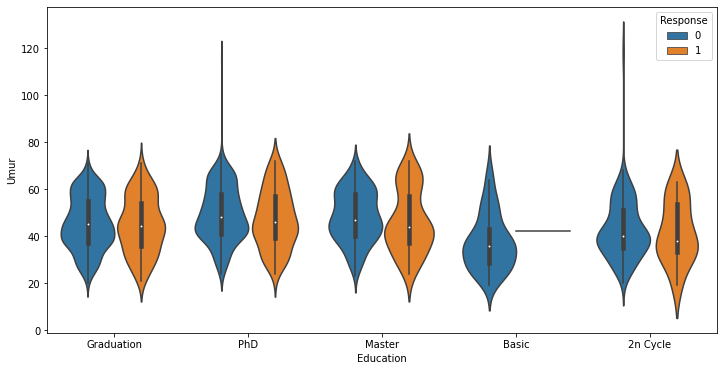

In [152]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, y='Umur', x='Education', hue='Response')

* ### Sebaran jumlah Edukasi pada kategori Response 1

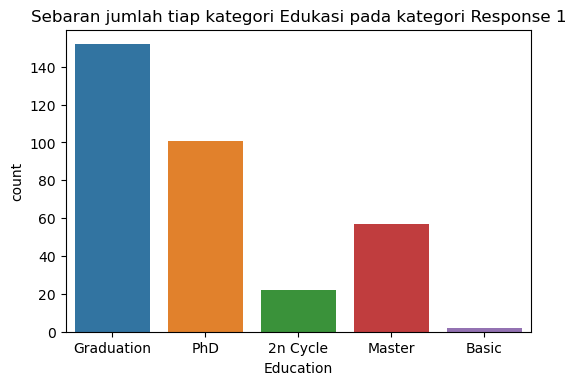

In [153]:
plt.figure(figsize=(6,4), dpi=100)
sns.countplot(df.Education[df.Response==1])
plt.title('Sebaran jumlah tiap kategori Edukasi pada kategori Response 1');

* ### Distribusi antara jumlah Total Campaign dengan Perbedaan Kategori Response

In [154]:
df['Total_Campaign'] = df['AcceptedCmp1'] +df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']
df['Total_Spending'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

<AxesSubplot:xlabel='Total_Campaign', ylabel='count'>

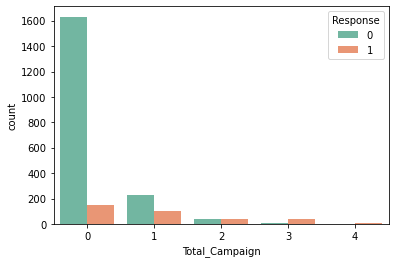

In [155]:
sns.countplot(data=df, x='Total_Campaign', hue='Response', palette='Set2')

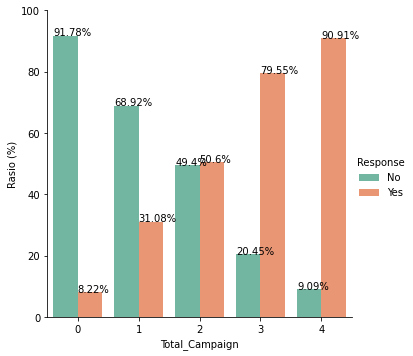

In [156]:
df1 = df.groupby('Total_Campaign')['Response'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Rasio (%)').reset_index()

g = sns.catplot(x='Total_Campaign',y='Rasio (%)',hue='Response',kind='bar',data=df1, palette='Set2')
g.ax.set_ylim(0,100)

new_title = 'Response'
g._legend.set_title(new_title)

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
    
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [157]:
df_total_campaign = pd.crosstab(df['Total_Campaign'], df['Response'])
df_total_campaign

Response           0    1
Total_Campaign           
0               1631  146
1                224  101
2                 41   42
3                  9   35
4                  1   10

* dari grafik diatas dapat ditarik insight atau gambaran bahwasanya customer yang semakin banyak merespon campaign sebelumnya, cenderung untuk merespon campaign di kemudian hari atau yang akan datang

<AxesSubplot:xlabel='Total_Campaign', ylabel='Response'>

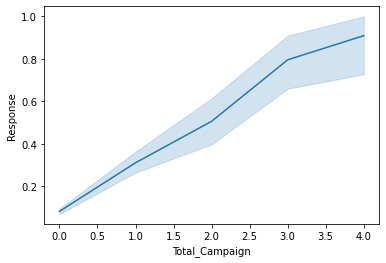

In [158]:
sns.lineplot(data=df, x='Total_Campaign', y='Response')

** lebih ke arah ke perubahan percentage

* ### Hubungan total campaign dengan spending dan purchase

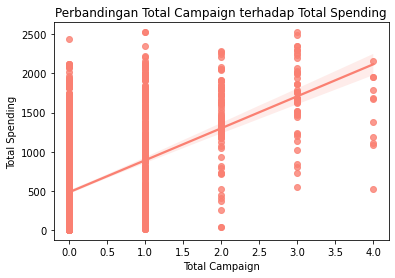

In [159]:
plt.figure(figsize=(6,4))
sns.regplot(df['Total_Campaign'],
           df['Total_Spending'],
           color='salmon')
plt.title('Perbandingan Total Campaign terhadap Total Spending')
plt.xlabel('Total Campaign')
plt.ylabel('Total Spending');

Text(0, 0.5, 'Total Purchase')

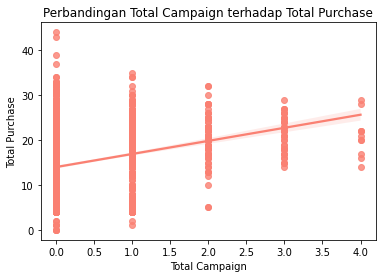

In [160]:
plt.figure(figsize=(6,4))
sns.regplot(df['Total_Campaign'],
           df['Total_Purchase'],
           color='salmon')
plt.title('Perbandingan Total Campaign terhadap Total Purchase')
plt.xlabel('Total Campaign')
plt.ylabel('Total Purchase')

* ### Hubungan antara Income and Spending tiap Produk pada Kasus Response kategori 1

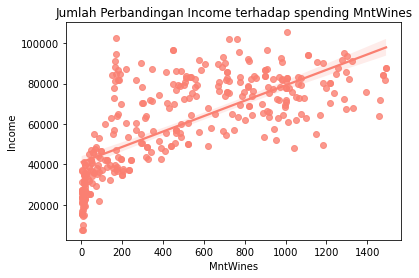

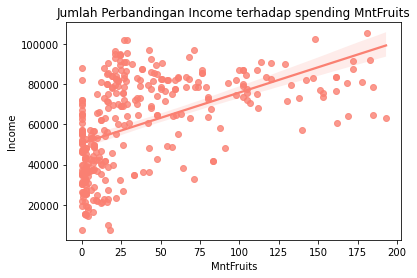

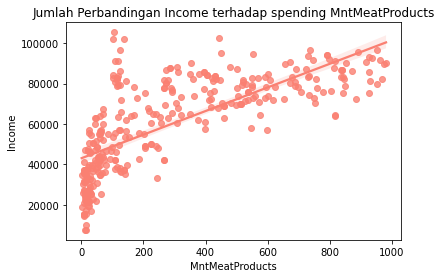

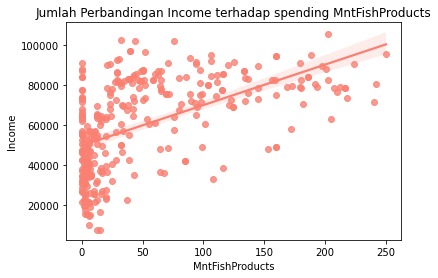

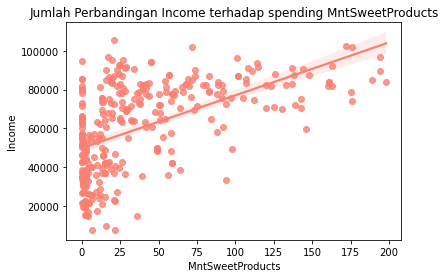

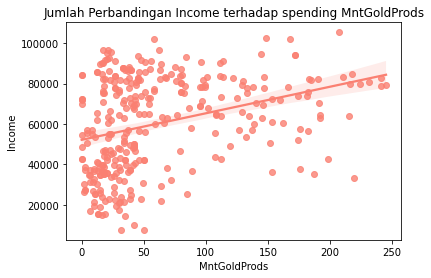

In [161]:
# Relation about Income and Spending amount pada Kasus Response kategori 1

for col in belanja:
    plt.figure(figsize=(6,4))
    sns.regplot(df[col][df.Response == 1],
           df.Income[df.Response == 1],
           color='salmon')
    plt.title('Jumlah Perbandingan Income terhadap spending ' + col)
    plt.xlabel(col)
    plt.ylabel('Income')

* berdasarkan grafik diatas dapat disimpulkan, ketika income semakin tinggi, kemungkinan spending amount pada suatu produk akan semakin besar

* ### Hubungan antara Income and jumlah jenis pembelian (NumPurchase) pada Kasus Response kategori 1

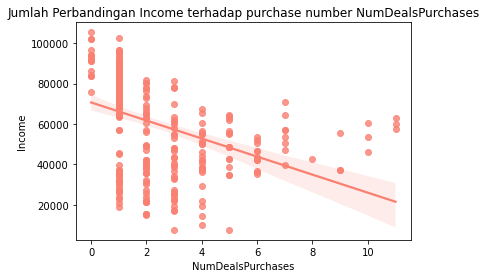

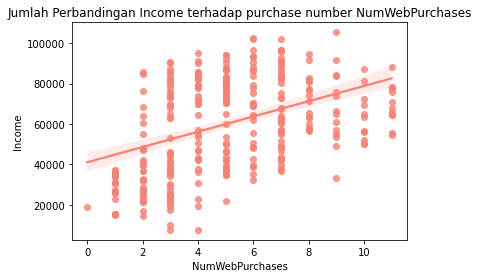

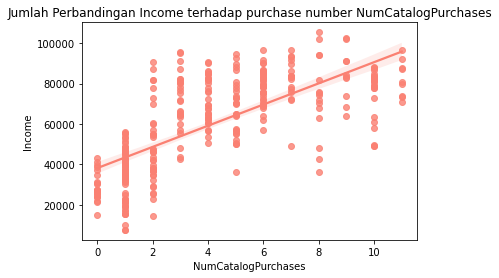

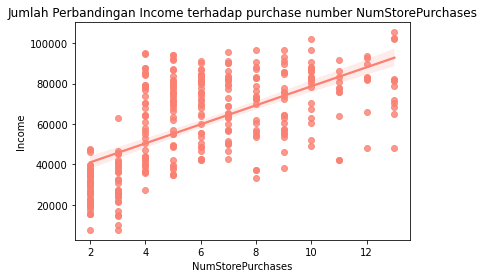

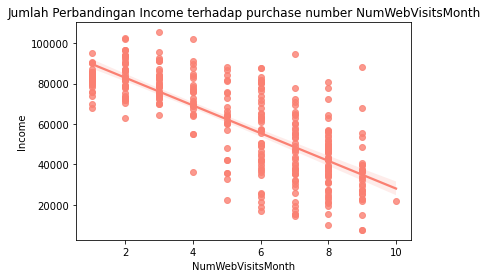

In [162]:
# Relation about Income and Spending amount pada Kasus Response kategori 1

for col in jenispembelian:
    plt.figure(figsize=(6,4))
    sns.regplot(df[col][df.Response == 1],
           df.Income[df.Response == 1],
           color='salmon')
    plt.title('Jumlah Perbandingan Income terhadap purchase number ' + col)
    plt.xlabel(col)
    plt.ylabel('Income')

* Berdasarkan tabel diatas, ketika seseorang memiliki income yang tinggi, semaking tinggi pula kemungkinan jumlah transaksi yang dilakukan. 
* Hal ini berbanding terbalik pada kategori transaksi bertipe diskon, dimana seseorang cenderung memanfaatkan diskon ketika income yang dimiliki cenderung rendah
* Seseorang dengan income yang cenderung rendah lebih sering mengujungi web yang diduga untuk melakukan pencarian produk secara cepat dan kemungkinan adanya tawaran diskon

In [163]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Observed_Time  Umur Kelompok_Usia  \
0              3         11         1    2015-02-02    58  Baby boomers   
1              3         11         0    2015-02-02    61  Baby boomers   
2              3         11         0    2015-02-02    50    Generasi X   
3              3         11         0    2015-02-02    31    Generasi Y   
4              3         11         0    2015-02-02    34    Generasi Y   

   Total_Campaign  Total_Purchase  Total_Spending  
0               0              25            1617  
1               0               6              27  
2               0              21             776  
3               0               8              53  
4               0              19             422

In [164]:
## Sebaran data Education

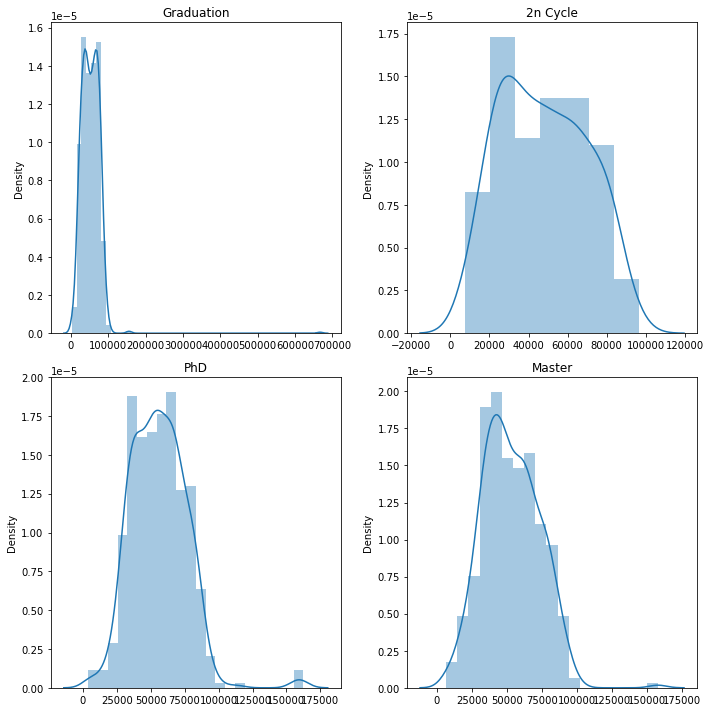

In [165]:
# Distplot
f, axes = plt.subplots(2, 2,figsize=(10,10))
ax1 = sns.distplot(df[df['Education']=='Graduation'][['Income']],ax=axes[0][0])
ax2 = sns.distplot(df[df['Education']=='2n Cycle'][['Income']],ax=axes[0][1])
ax3 = sns.distplot(df[df['Education']=='PhD'][['Income']],ax=axes[1][0])
ax4 = sns.distplot(df[df['Education']=='Master'][['Income']],ax=axes[1][1])
ax1.title.set_text('Graduation')
ax2.title.set_text('2n Cycle')
ax3.title.set_text('PhD')
ax4.title.set_text('Master')
plt.tight_layout()
plt.show()

In [166]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Observed_Time  Umur Kelompok_Usia  \
0              3         11         1    2015-02-02    58  Baby boomers   
1              3         11         0    2015-02-02    61  Baby boomers   
2              3         11         0    2015-02-02    50    Generasi X   
3              3         11         0    2015-02-02    31    Generasi Y   
4              3         11         0    2015-02-02    34    Generasi Y   

   Total_Campaign  Total_Purchase  Total_Spending  
0               0              25            1617  
1               0               6              27  
2               0              21             776  
3               0               8              53  
4               0              19             422

* ### Hubungan mengenai lamanya customer bergabung (join) pada Kasus Response kategori 1

In [167]:
df['Join_Period'] = df['Observed_Time'].dt.to_period('M').astype(int) - df['Dt_Customer'].dt.to_period('M').astype(int)

## Lamanya bergabung dalam satuan nilai bulan ( berapa bulan telah bergabung )

In [168]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Observed_Time  Umur Kelompok_Usia  \
0              3         11         1    2015-02-02    58  Baby boomers   
1              3         11         0    2015-02-02    61  Baby boomers   
2              3         11         0    2015-02-02    50    Generasi X   
3              3         11         0    2015-02-02    31    Generasi Y   
4              3         11         0    2015-02-02    34    Generasi Y   

   Total_Campaign  Total_Purchase  Total_Spending  Join_Period  
0               0              25            1617           29  
1               0               6              27           11  
2               0              21             776           18  
3               0               8              53           12  
4               0              19             422           13

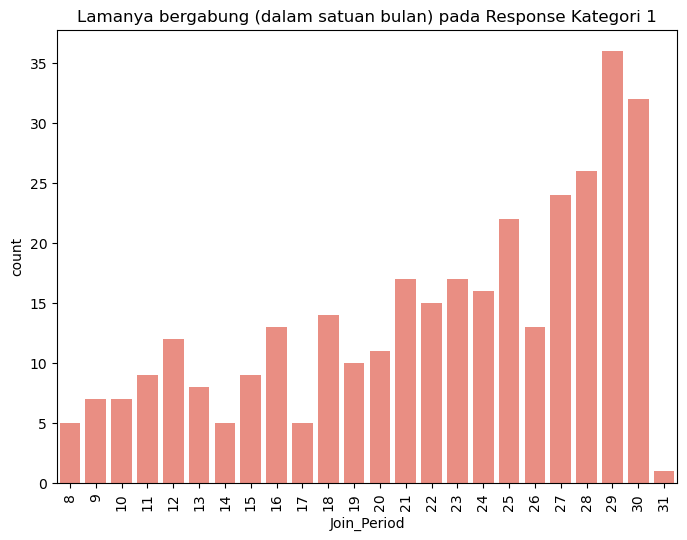

In [169]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x=df.Join_Period[df.Response==1], color='salmon')
plt.xticks(rotation=90)
plt.title('Lamanya bergabung (dalam satuan bulan) pada Response Kategori 1')
plt.show()

* Customer yang telah lama bergabung cenderung untuk meresponse campaign marketing ( didasar pada grafik diatas)

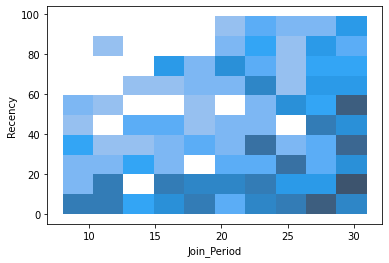

In [170]:
sns.histplot(y=df.Recency[df.Response==1], x=df.Join_Period[df.Response==1]);

In [171]:
for x in belanja:
    print('Rata rata belanja produk ' + x + ' adalah ',np.mean(df[x][df.Response==1]))

Rata rata belanja produk MntWines adalah  502.70359281437123
Rata rata belanja produk MntFruits adalah  38.203592814371255
Rata rata belanja produk MntMeatProducts adalah  294.3532934131737
Rata rata belanja produk MntFishProducts adalah  52.050898203592816
Rata rata belanja produk MntSweetProducts adalah  38.634730538922156
Rata rata belanja produk MntGoldProds adalah  61.446107784431135


In [172]:
for x in jenispembelian:
    print('Rata rata pembelian ' + x + ' adalah ',np.mean(df[x][df.Response==1]))

Rata rata pembelian NumDealsPurchases adalah  2.3353293413173652
Rata rata pembelian NumWebPurchases adalah  5.07185628742515
Rata rata pembelian NumCatalogPurchases adalah  4.203592814371257
Rata rata pembelian NumStorePurchases adalah  6.095808383233533
Rata rata pembelian NumWebVisitsMonth adalah  5.293413173652695


In [173]:
for x in belanja:
    print('Rata rata belanja produk ' + x + ' adalah ',np.mean(df[x][df.Response==0]))

Rata rata belanja produk MntWines adalah  269.104407135362
Rata rata belanja produk MntFruits adalah  24.216684155299056
Rata rata belanja produk MntMeatProducts adalah  144.6243441762854
Rata rata belanja produk MntFishProducts adalah  34.9800629590766
Rata rata belanja produk MntSweetProducts adalah  25.035152151101784
Rata rata belanja produk MntGoldProds adalah  40.968520461699896


In [174]:
for x in jenispembelian:
    print('Rata rata pembelian ' + x + ' adalah ',np.mean(df[x][df.Response==0]))

Rata rata pembelian NumDealsPurchases adalah  2.323189926547744
Rata rata pembelian NumWebPurchases adalah  3.911857292759706
Rata rata pembelian NumCatalogPurchases adalah  2.3919202518363063
Rata rata pembelian NumStorePurchases adalah  5.736621196222456
Rata rata pembelian NumWebVisitsMonth adalah  5.320566631689402


In [175]:
## Menggabungkan kolom kids dan teenhome menjadi Jumlah_anak

df['Jumlah_Anak'] = df['Kidhome'] + df['Teenhome']

## DATA PREPROCESSING ( STAGE 2 )

* ### Feature Extraction

Pada langkah sebelumnya telah dilakukan beberapa feature extraction terlebih dahulu guna mendapat insight lebih jelas mengenai visualisasi data baik dalam bentuk univariate maupun multivariate analysis.

Kolom baru tersebut meliput :
* Umur ( diambil tahun kelahiran hingga dari waktu pengambilan data )
* Kelompok_usia ( pengelompokkan usia berdasarkan tahun kelahiran)
* Total_purchase ( total jumlah angka pembelian di setiap kategori )
* Total_spending ( total jumlah belanja dari awal hingga akhir )
* JoinPeriod ( lama waktu customer dari awal bergabung hinggal waktu pengambilan data)
* Observed_Time ( waktu pengambilan data diambil )
* Jumlah_Anak ( total jumlah teenager dan kid )

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

* ### Handling Missing Values

In [177]:
df['Income'].isnull().sum()

24

In [178]:
df.groupby('Education').median()[['Income']]

Income
Education          
2n Cycle    46805.0
Basic       20744.0
Graduation  52028.5
Master      50943.0
PhD         55212.0

In [179]:
print('Kolom pada income yang memiliki nilai missing',df[df['Income'].isna()]['Education'].unique())

Kolom pada income yang memiliki nilai missing ['Graduation' 'PhD' '2n Cycle' 'Master']


In [180]:
## Impute nilai missing value pada income sesuai dengan tingkat edukasi customer dengan pendekatan nilai median

In [181]:
def fillna(col):
    if pd.isna(col['Income']):
        if col['Education'] == '2n Cycle':
            return 46805.0
        elif col['Education'] == 'Graduation':
            return 52028.5
        elif col['Education'] == 'PhD':
            return 55212.0
        elif col['Education'] == 'Master':
            return 50943.0
    else:
        return col['Income']

In [182]:
df['Income'] = df[['Education', 'Income']].apply(fillna, axis=1)

In [183]:
df['Income'].isna().sum()

0

* ### Handling Outliers

* #### Outliers pada kolom umur

In [184]:
pd.DataFrame(df['Umur'].sort_values(ascending=False))

Umur
239    122
339    116
192    115
1950    75
424     74
...    ...
696     20
747     20
995     20
1170    19
46      19

[2240 rows x 1 columns]

In [185]:
### membuang kolom umur diatas 100 tahun
### memfilter hanya umur dibawah 100 tahun

df = df[df.Umur < 100]
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

* #### Outliers pada Income

In [186]:
df.Response.value_counts()

0    1903
1     334
Name: Response, dtype: int64

In [187]:
# Handling Outlier Berdsarkan Z-Score
# Outlier Income dibuang karena dianggap tidak memiliki dampak yang signifikan jika outliernya dibuang

z_scores = np.abs(stats.zscore(df['Income']))
filtered_entries = (z_scores < 3)
df = df[filtered_entries]

df
# Terdapat 8 outlier yang dibuang berdasarkan kolom Income

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

* ### Membuang kolom yang tidak relevan

In [188]:
col_drop = ['ID', 'Year_Birth', 'Dt_Customer', 'Observed_Time', 'Complain', 'Z_CostContact', 'Z_Revenue']

df = df.drop(col_drop, axis=1)

In [189]:
df

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single  58138.0        0         0       58   
1     Graduation         Single  46344.0        1         1       38   
2     Graduation       Together  71613.0        0         0       26   
3     Graduation       Together  26646.0        1         0       26   
4            PhD        Married  58293.0        1         0       94   
...          ...            ...      ...      ...       ...      ...   
2235  Graduation        Married  61223.0        0         1       46   
2236         PhD       Together  64014.0        2         1       56   
2237  Graduation       Divorced  56981.0        0         0       91   
2238      Master       Together  69245.0        0         1        8   
2239         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Umur Kelompok_Usia  \
0                0             0             0         1    58  Baby boomers   
1                0             0             0         0    61  Baby boomers   
2                0             0             0         0    50    Generasi X   
3          

* ### Handling imbalanced data

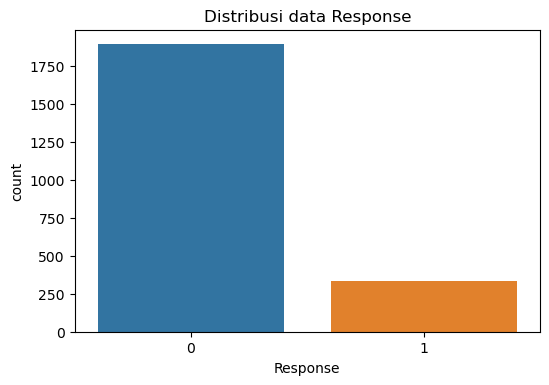

In [190]:
visual_countplot('Response')

**Terlihat bahwasanya data response atau target variabel tidak balanced secara merata, sehingga pada proses modelling nanti akan dilakukan proses oversampling pada data train dalam hal menangani imbalanced class**

* ### CORRELATION BETWEEN FEATURES

<AxesSubplot:>

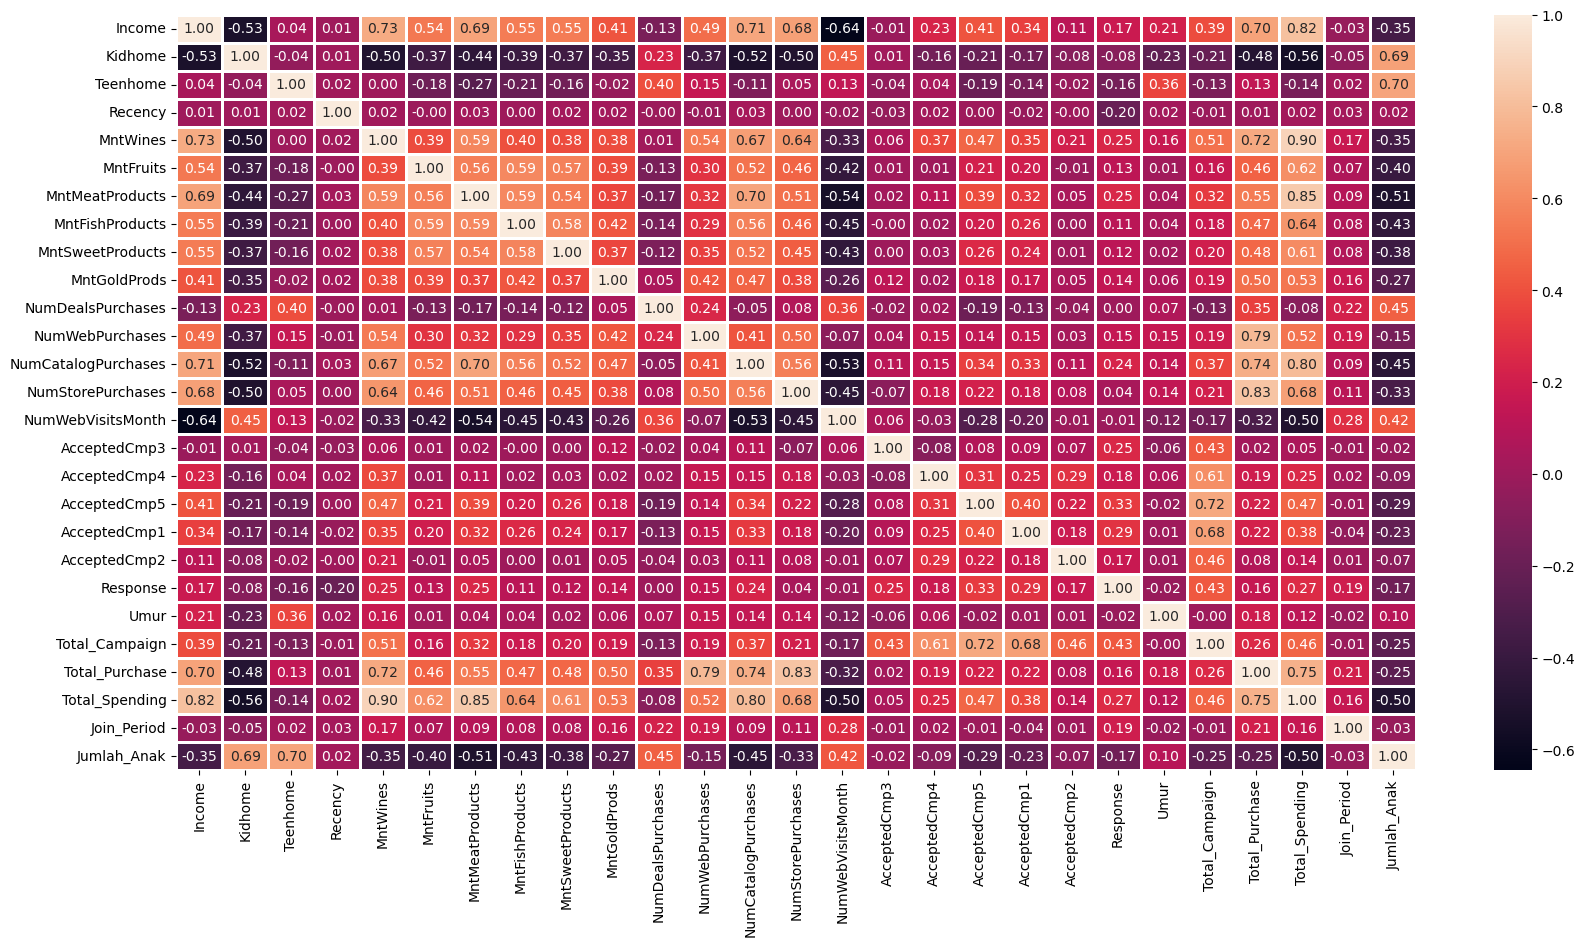

In [191]:
correlation_df = df.corr()

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(correlation_df, annot=True, linewidths=1, fmt='.2f')

* Dari grafik heatmap diatas masih ditemukan feature redundan atau korelasi antar feature yang memiliki nilai tinggi. Pada proses modelling nantinya akan dilakukan proses filtering feature lagi agar tidak terjadi overfitting pada hasil model yang diharapkan

In [192]:
corr = df.corr()['Response'].sort_values(ascending=False)
corr = corr[1:]
corr

Total_Campaign         0.425875
AcceptedCmp5           0.327911
AcceptedCmp1           0.293617
Total_Spending         0.266786
AcceptedCmp3           0.253838
MntMeatProducts        0.247103
MntWines               0.246534
NumCatalogPurchases    0.235325
Join_Period            0.194444
AcceptedCmp4           0.176544
Income                 0.174423
AcceptedCmp2           0.169131
Total_Purchase         0.156328
NumWebPurchases        0.147032
MntGoldProds           0.139726
MntFruits              0.125192
MntSweetProducts       0.116545
MntFishProducts        0.110609
NumStorePurchases      0.036697
NumDealsPurchases      0.003424
NumWebVisitsMonth     -0.007097
Umur                  -0.018918
Kidhome               -0.080514
Teenhome              -0.155726
Jumlah_Anak           -0.170480
Recency               -0.199078
Name: Response, dtype: float64

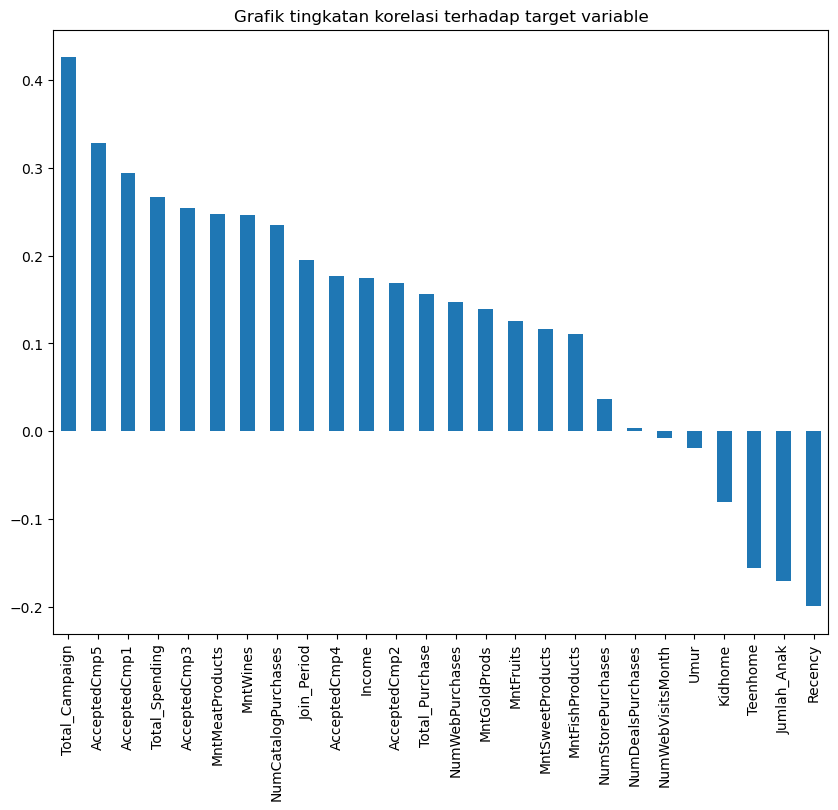

In [193]:
plt.figure(figsize=(10,8), dpi=100)
corr.plot(kind='bar')
plt.title('Grafik tingkatan korelasi terhadap target variable')
plt.show()

* Tingkat korelasi feature numeric dengan target tidak ada yang melebihi nilai 0.5 dan dapat dilihat secara berurutan feature mana yang memiliki nilai korelasi paling tinggi hingga terendah

## Standarisasi feature numerik

In [194]:
#  log gaji, amount spend in product & number of purchases kita standarisasi
#df['Umur'] = StandardScaler().fit_transform(df['Umur'].values.reshape(len(df), 1))
#df['Income'] = StandardScaler().fit_transform(df['Income'].values.reshape(len(df), 1))
#df['MntWines'] = StandardScaler().fit_transform(df['MntWines'].values.reshape(len(df), 1))
#df['MntFruits'] = StandardScaler().fit_transform(df['MntFruits'].values.reshape(len(df), 1))
#df['MntMeatProducts'] = StandardScaler().fit_transform(df['MntMeatProducts'].values.reshape(len(df), 1))
#df['MntFishProducts'] = StandardScaler().fit_transform(df['MntFishProducts'].values.reshape(len(df), 1))
#df['MntSweetProducts'] = StandardScaler().fit_transform(df['MntSweetProducts'].values.reshape(len(df), 1))
#df['MntGoldProds'] = StandardScaler().fit_transform(df['MntGoldProds'].values.reshape(len(df), 1))
#df['NumDealsPurchases'] = StandardScaler().fit_transform(df['NumDealsPurchases'].values.reshape(len(df), 1))
#df['NumWebPurchases'] = StandardScaler().fit_transform(df['NumWebPurchases'].values.reshape(len(df), 1))
#df['NumStorePurchases'] = StandardScaler().fit_transform(df['NumStorePurchases'].values.reshape(len(df), 1))
#df['NumWebVisitsMonth'] = StandardScaler().fit_transform(df['NumWebVisitsMonth'].values.reshape(len(df), 1))
#df['NumCatalogPurchases'] = StandardScaler().fit_transform(df['NumCatalogPurchases'].values.reshape(len(df), 1))
#df['Total_Spending'] = StandardScaler().fit_transform(df['Total_Spending'].values.reshape(len(df), 1))
#df['Total_Purchase'] = StandardScaler().fit_transform(df['Total_Purchase'].values.reshape(len(df), 1))

# MODELLING & EVALUATION ( STAGE 3)

### Pemilihan Dataset untuk proses Modelling sebagai alternative

Dataset yaitu df ini nantinya akan terbagi ke dalam berbagai skenario untuk mendapatkan nilai terbaik pada proses modelling

# DATASET 1

In [195]:
df_1 = df.copy()

In [196]:
# drop kolom yang tidak relevan atau memiliki korelasi yang tinggi antar feature
drop_col = ['Kidhome', 'Teenhome', 'Total_Spending', 'MntWines','NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases', 'Kelompok_Usia', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

df_1 = df_1.drop(drop_col, axis=1)
df_1.head()

Education Marital_Status   Income  Recency  MntFruits  MntMeatProducts  \
0  Graduation         Single  58138.0       58         88              546   
1  Graduation         Single  46344.0       38          1                6   
2  Graduation       Together  71613.0       26         49              127   
3  Graduation       Together  26646.0       26          4               20   
4         PhD        Married  58293.0       94         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
0              172                88            88                  7   
1                2                 1             6                  5   
2              111                21            42                  4   
3               10                 3             5                  6   
4               46                27            15                  5   

   Response  Umur  Total_Campaign  Total_Purchase  Join_Period  Jumlah_Anak  
0         1    58               0              25           29            0  
1         0    61               0               6           11            2  
2         0    50               0              21           18            0  
3         0    31               0               8           12            1  
4         0    34               0              19           13            1

In [197]:
df_1 = pd.get_dummies(df_1)
df_1

Income  Recency  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58         88              546              172   
1     46344.0       38          1                6                2   
2     71613.0       26         49              127              111   
3     26646.0       26          4               20               10   
4     58293.0       94         43              118               46   
...       ...      ...        ...              ...              ...   
2235  61223.0       46         43              182               42   
2236  64014.0       56          0               30                0   
2237  56981.0       91         48              217               32   
2238  69245.0        8         30              214               80   
2239  52869.0       40          3               61                2   

      MntSweetProducts  MntGoldProds  NumWebVisitsMonth  Response  Umur  \
0                   88            88                  7         1    58   
1                    1             6                  5         0    61   
2                   21            42                  4         0    50   
3                    3             5                  6         0    31   
4                   27            15                  5         0    34   
...                ...           ...                ...       ...   ...   
2235               118           247                  5         0    48   
2236                 0             8                  7         0    69   
2237                12            24                  6         0    34   
2238                30            61                  3         0    59   
2239                 1            21                  7         1    61   

      Total_Campaign  Total_Purchase  Join_Period  Jumlah_Anak  \
0                  0              25           29            0   
1                  0               6           11            2   
2                  0              21           18            0   
3                  0               8           12            1   
4                  0              19           13            1   
...              ...             ...          ...          ...   
2235               0              18           20            1   
2236               1              22            8            3   
2237               1              19           13            0   
2238               0              23           13            1   
2239               0              11           28            2   

      Education_2n Cycle  Education_Basic  Education_Graduation  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     0   
...                  ...              ...                   ...   
2235                   0                0                     1   
2236                   0                0                     0   
2237                   0                0                     1   
2238                   0                0                     0   
2239                   0                0                     0   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
0                    0              0                      0   
1                    0              0                      0   
2                    0              0                      0   
3                    0              0                      0   
4                    0              1                      0   
...                ...            ...                    ...   
2235                 0              0                      0   
2236                 0              1                      0   
2237                 0              0                      0   
2238           

<AxesSubplot:>

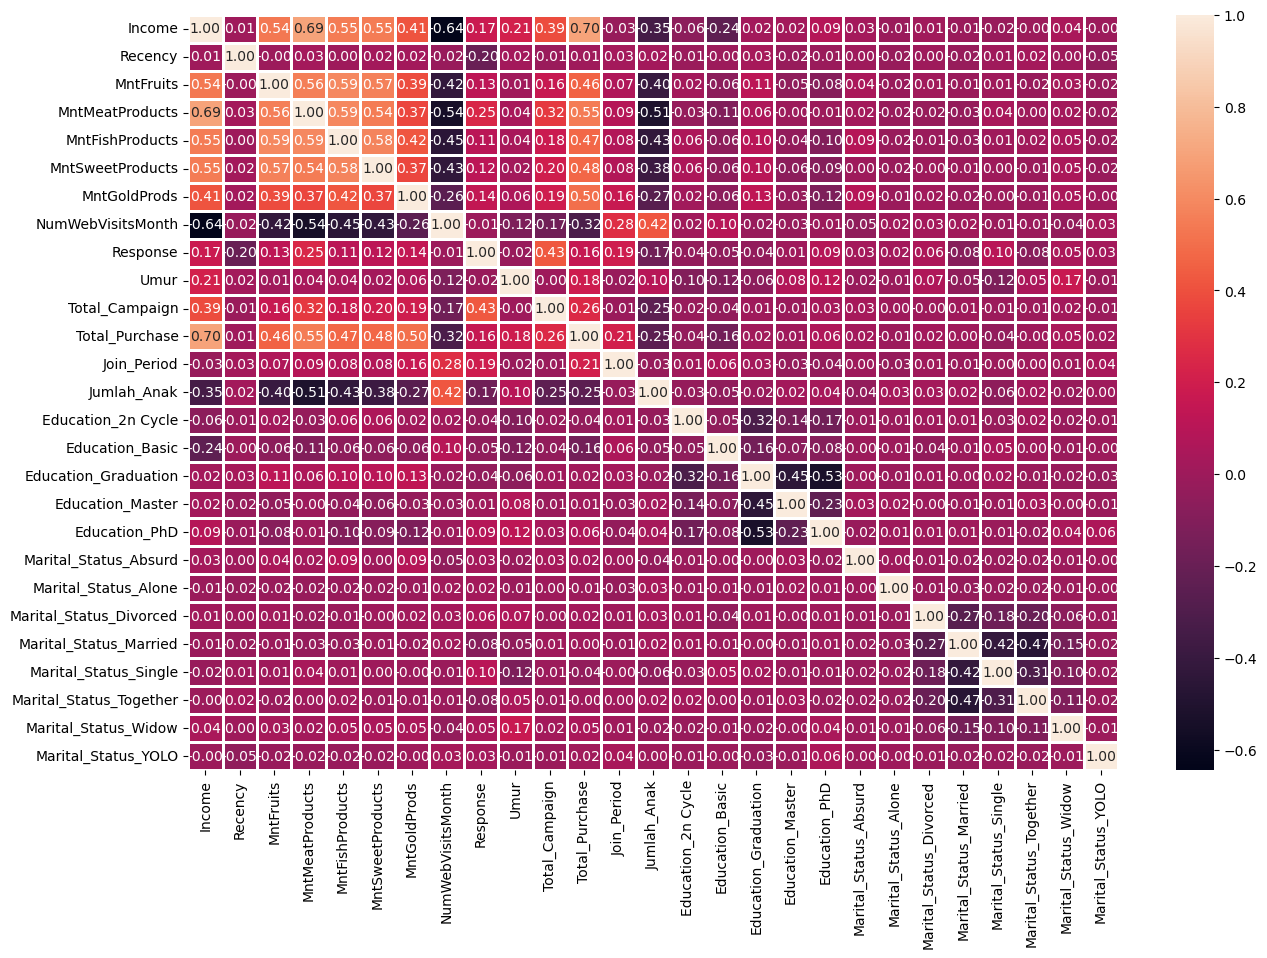

In [198]:
correlation = df_1.corr()

plt.figure(figsize=(15,10), dpi=100)
sns.heatmap(correlation, annot=True,  linewidth=2, fmt='.2f')

In [199]:
X = df_1.drop('Response', axis=1)
y = df_1['Response']

## Proses Modelling

In [200]:
from sklearn.model_selection import train_test_split

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.preprocessing import StandardScaler, RobustScaler

from imblearn import over_sampling, under_sampling
#X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

In [201]:
## Standarisasi data mengunakan RobustScaler()

scaler = StandardScaler()

## X_train dilakukan fit dan transform
X = pd.DataFrame(
    scaler.fit_transform(X),
    columns = X.columns)

In [202]:
## Splitting data menjadi train and test

np.random.seed(100)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3)

In [203]:
## Oversampling pada data train

np.random.seed(100)
X_train1, y_train1 = over_sampling.SMOTE().fit_resample(X_train1, y_train1)

In [204]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(100)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [205]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                             X_train=X_train1,
                             X_test=X_test1,
                             y_train=y_train1,
                             y_test=y_test1)
model_scores

Learning rate set to 0.015579
0:	learn: 0.6845306	total: 164ms	remaining: 2m 44s
1:	learn: 0.6741836	total: 168ms	remaining: 1m 23s
2:	learn: 0.6660479	total: 172ms	remaining: 57.2s
3:	learn: 0.6560733	total: 177ms	remaining: 44.1s
4:	learn: 0.6476413	total: 182ms	remaining: 36.3s
5:	learn: 0.6388142	total: 187ms	remaining: 31s
6:	learn: 0.6308732	total: 192ms	remaining: 27.2s
7:	learn: 0.6239668	total: 197ms	remaining: 24.4s
8:	learn: 0.6141859	total: 201ms	remaining: 22.2s
9:	learn: 0.6064116	total: 206ms	remaining: 20.4s
10:	learn: 0.5973675	total: 211ms	remaining: 18.9s
11:	learn: 0.5906910	total: 216ms	remaining: 17.8s
12:	learn: 0.5827839	total: 220ms	remaining: 16.7s
13:	learn: 0.5758492	total: 226ms	remaining: 15.9s
14:	learn: 0.5685957	total: 232ms	remaining: 15.2s
15:	learn: 0.5635171	total: 236ms	remaining: 14.5s
16:	learn: 0.5572861	total: 240ms	remaining: 13.9s
17:	learn: 0.5505790	total: 244ms	remaining: 13.3s
18:	learn: 0.5445082	total: 248ms	remaining: 12.8s
19:	learn: 

{'KNN': 0.7488789237668162,
 'Logistic Regression': 0.8086696562032885,
 'Random Forest': 0.8849028400597907,
 'Decision Tree': 0.804185351270553,
 'Adaboost Class': 0.85949177877429,
 'CatBoost Class': 0.8968609865470852,
 'XGB Class': 0.8938714499252616}

* ### Melakukan evaluasi serta penelusuran hasil lebih jauh dari model dengan nilai akurasi tinggi

In [325]:
np.random.seed(100)
clf = CatBoostClassifier()
clf.fit(X_train1, y_train1)
clf.score(X_test1, y_test1)

Learning rate set to 0.015579
0:	learn: 0.6845306	total: 5.09ms	remaining: 5.09s
1:	learn: 0.6741836	total: 10.1ms	remaining: 5.04s
2:	learn: 0.6660479	total: 15ms	remaining: 5s
3:	learn: 0.6560733	total: 19.8ms	remaining: 4.94s
4:	learn: 0.6476413	total: 24.3ms	remaining: 4.83s
5:	learn: 0.6388142	total: 28.8ms	remaining: 4.78s
6:	learn: 0.6308732	total: 33.5ms	remaining: 4.76s
7:	learn: 0.6239668	total: 38.4ms	remaining: 4.76s
8:	learn: 0.6141859	total: 42.8ms	remaining: 4.71s
9:	learn: 0.6064116	total: 47.7ms	remaining: 4.72s
10:	learn: 0.5973675	total: 53ms	remaining: 4.76s
11:	learn: 0.5906910	total: 57.6ms	remaining: 4.75s
12:	learn: 0.5827839	total: 62.5ms	remaining: 4.75s
13:	learn: 0.5758492	total: 67.7ms	remaining: 4.77s
14:	learn: 0.5685957	total: 73.2ms	remaining: 4.81s
15:	learn: 0.5635171	total: 79.3ms	remaining: 4.88s
16:	learn: 0.5572861	total: 84.9ms	remaining: 4.91s
17:	learn: 0.5505790	total: 89.7ms	remaining: 4.89s
18:	learn: 0.5445082	total: 95.3ms	remaining: 4.92s

0.8968609865470852

In [326]:
y_preds1 = clf.predict(X_test1)

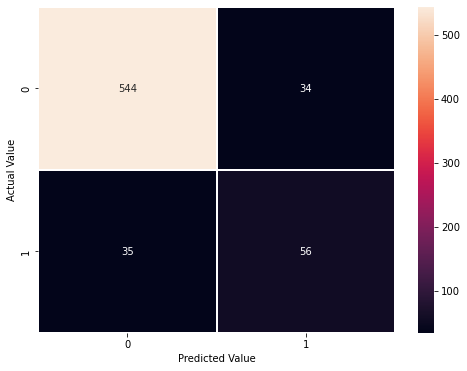

In [327]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test1,y_preds1), annot=True, fmt='0.0f', linewidths=2)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [328]:
# Show classification report
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       578
           1       0.62      0.62      0.62        91

    accuracy                           0.90       669
   macro avg       0.78      0.78      0.78       669
weighted avg       0.90      0.90      0.90       669



## ROC Curve

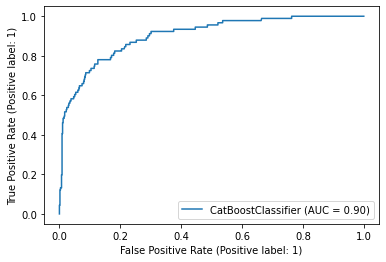

In [329]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test1, y_test1);

In [211]:
clf.score(X_train1, y_train1)

0.9958238420653

In [212]:
clf.score(X_test1, y_test1)

0.8849028400597907

## Cross Validation

In [213]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf,
                         X_train1,
                         y_train1,
                         cv=5, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
cv_train

array([0.83491461, 0.95256167, 0.9487666 , 0.95066414, 0.9486692 ])

In [214]:
cv_mean = np.mean(cv_train)
cv_mean

0.9271152444787555

In [215]:
# Cross-validated accuracy score on Test Dataset
cv_test = cross_val_score(clf,
                         X_test1,
                         y_test1,
                         cv=10, # 5-fold cross-validation
                         scoring='accuracy') # accuracy as scoring
cv_test

array([0.94029851, 0.85074627, 0.89552239, 0.89552239, 0.89552239,
       0.92537313, 0.88059701, 0.88059701, 0.89552239, 0.89393939])

In [216]:
cv_mean = np.mean(cv_test)
cv_mean

0.8953640886476707

In [217]:
from sklearn.model_selection import cross_validate

In [218]:
validation = cross_validate(clf, X, y, cv=5, return_train_score=True, scoring='accuracy')

validation

{'fit_time': array([0.26039648, 0.24994135, 0.24994135, 0.23741174, 0.24791408]),
 'score_time': array([0.00409079, 0.01562285, 0.01562285, 0.01562119, 0.01562142]),
 'test_score': array([0.87668161, 0.89237668, 0.87219731, 0.86995516, 0.88089888]),
 'train_score': array([0.99270892, 0.99270892, 0.99383062, 0.99495233, 0.99159193])}

# DATASET 2

In [219]:
df_2 = df.copy()
df_2

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0     Graduation         Single  58138.0        0         0       58   
1     Graduation         Single  46344.0        1         1       38   
2     Graduation       Together  71613.0        0         0       26   
3     Graduation       Together  26646.0        1         0       26   
4            PhD        Married  58293.0        1         0       94   
...          ...            ...      ...      ...       ...      ...   
2235  Graduation        Married  61223.0        0         1       46   
2236         PhD       Together  64014.0        2         1       56   
2237  Graduation       Divorced  56981.0        0         0       91   
2238      Master       Together  69245.0        0         1        8   
2239         PhD        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Umur Kelompok_Usia  \
0                0             0             0         1    58  Baby boomers   
1                0             0             0         0    61  Baby boomers   
2                0             0             0         0    50    Generasi X   
3          

In [220]:
## Membuang colom yang tidak relevan dan redundan

drop_col = ['Income','Kidhome', 'Teenhome', 'Kelompok_Usia', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Total_Purchase', 'Total_Spending', 'NumCatalogPurchases', 'MntWines']

df_2 = df_2.drop(drop_col, axis=1)
df_2.head()

Education Marital_Status  Recency  MntFruits  MntMeatProducts  \
0  Graduation         Single       58         88              546   
1  Graduation         Single       38          1                6   
2  Graduation       Together       26         49              127   
3  Graduation       Together       26          4               20   
4         PhD        Married       94         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumStorePurchases  NumWebVisitsMonth  Response  Umur  \
0                8                  4                  7         1    58   
1                1                  2                  5         0    61   
2                8                 10                  4         0    50   
3                2                  4                  6         0    31   
4                5                  6                  5         0    34   

   Total_Campaign  Join_Period  Jumlah_Anak  
0               0           29            0  
1               0           11            2  
2               0           18            0  
3               0           12            1  
4               0           13            1

In [221]:
df_2 = pd.get_dummies(df_2)
df_2

Recency  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          58         88              546              172                88   
1          38          1                6                2                 1   
2          26         49              127              111                21   
3          26          4               20               10                 3   
4          94         43              118               46                27   
...       ...        ...              ...              ...               ...   
2235       46         43              182               42               118   
2236       56          0               30                0                 0   
2237       91         48              217               32                12   
2238        8         30              214               80                30   
2239       40          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumStorePurchases  \
0               88                  3                8                  4   
1                6                  2                1                  2   
2               42                  1                8                 10   
3                5                  2                2                  4   
4               15                  5                5                  6   
...            ...                ...              ...                ...   
2235           247                  2                9                  4   
2236             8                  7                8                  5   
2237            24                  1                2                 13   
2238            61                  2                6                 10   
2239            21                  3                3                  4   

      NumWebVisitsMonth  Response  Umur  Total_Campaign  Join_Period  \
0                     7         1    58               0           29   
1                     5         0    61               0           11   
2                     4         0    50               0           18   
3                     6         0    31               0           12   
4                     5         0    34               0           13   
...                 ...       ...   ...             ...          ...   
2235                  5         0    48               0           20   
2236                  7         0    69               1            8   
2237                  6         0    34               1           13   
2238                  3         0    59               0           13   
2239                  7         1    61               0           28   

      Jumlah_Anak  Education_2n Cycle  Education_Basic  Education_Graduation  \
0               0                   0                0                     1   
1               2                   0                0                     1   
2               0                   0                0                     1   
3               1                   0                0                     1   
4               1                   0                0                     0   
...           ...                 ...              ...                   ...   
2235            1                   0                0                     1   
2236            3                   0                0                     0   
2237            0                   0                0                     1   
2238            1                   0                0                     0   
2239            2                   0                0                     0   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
0                    0              0                      0   
1                    0              0                      0   
2                    0              0                      0   
3                    0              0 

<AxesSubplot:>

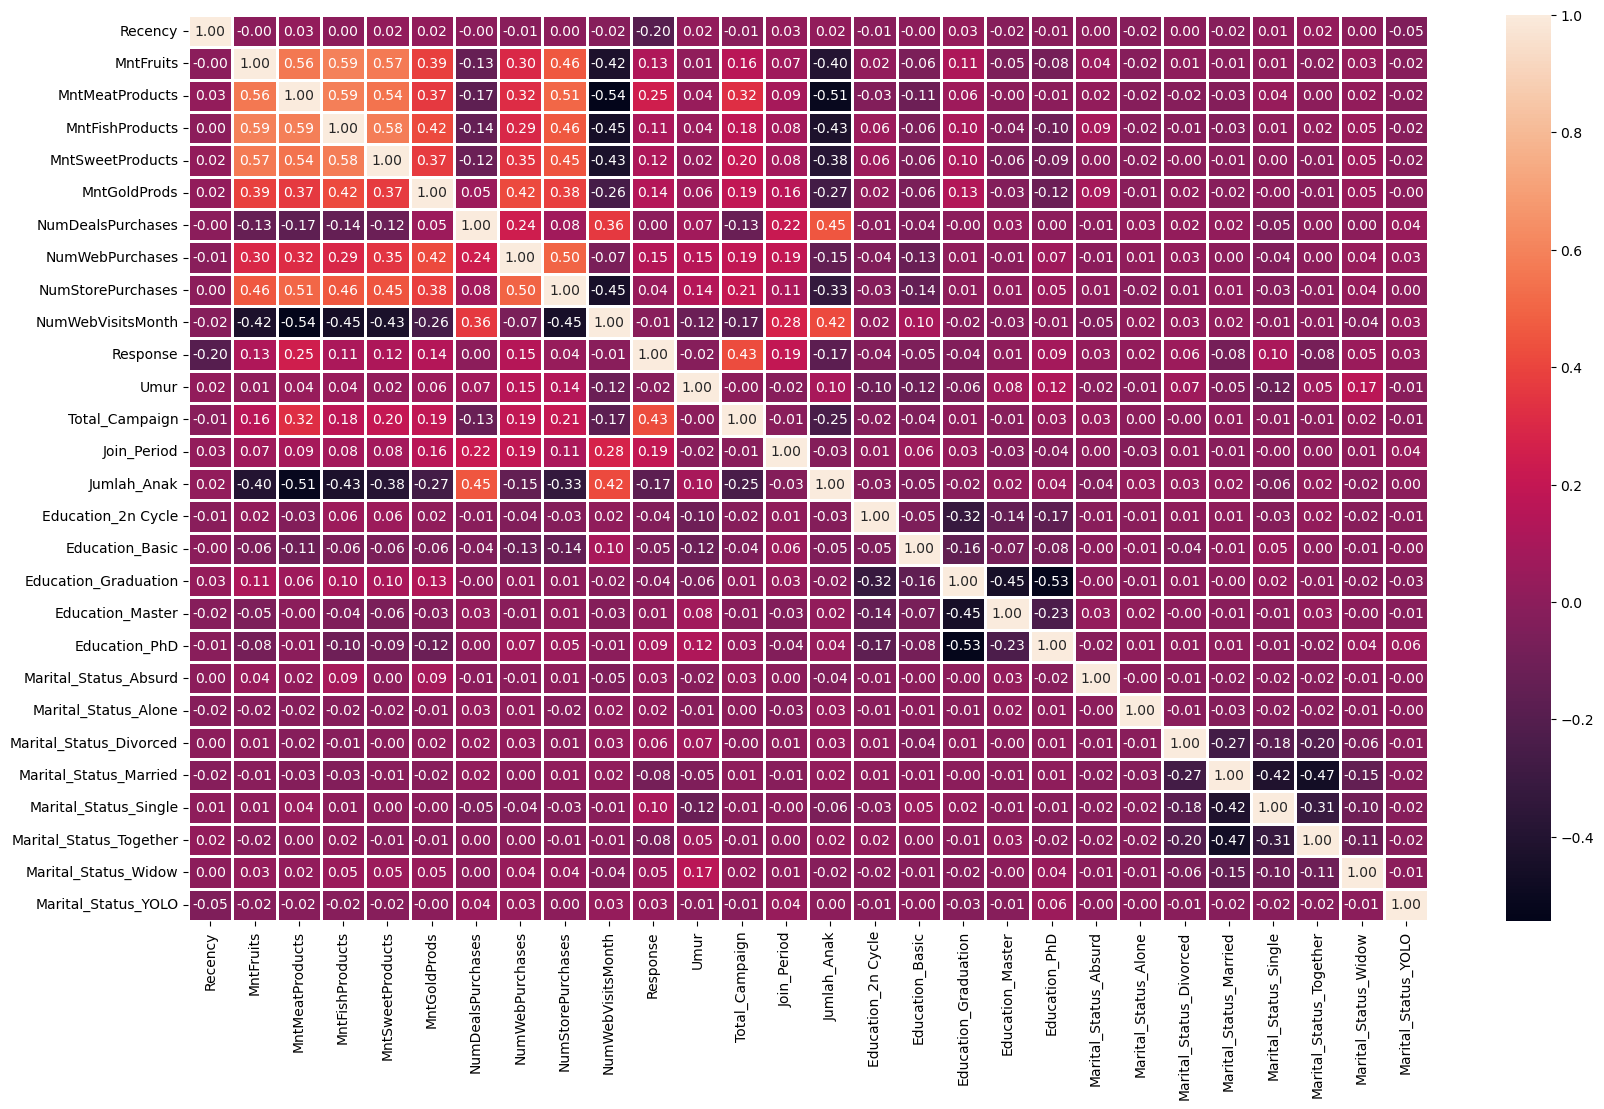

In [222]:
correlation = df_2.corr()

plt.figure(figsize=(20,12), dpi=100)
sns.heatmap(correlation, annot=True, linewidth=2, fmt='.2f')

* **Tidak ada korelasi antar feature yang melebihi threshold 0.7**

### Membagi dataset menjadi X (feature atau parameter) dan y (target variable)

In [223]:
X_2 = df_2.drop('Response', axis=1)
y_2 = df_2['Response']

In [224]:
X_2

Recency  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          58         88              546              172                88   
1          38          1                6                2                 1   
2          26         49              127              111                21   
3          26          4               20               10                 3   
4          94         43              118               46                27   
...       ...        ...              ...              ...               ...   
2235       46         43              182               42               118   
2236       56          0               30                0                 0   
2237       91         48              217               32                12   
2238        8         30              214               80                30   
2239       40          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumStorePurchases  \
0               88                  3                8                  4   
1                6                  2                1                  2   
2               42                  1                8                 10   
3                5                  2                2                  4   
4               15                  5                5                  6   
...            ...                ...              ...                ...   
2235           247                  2                9                  4   
2236             8                  7                8                  5   
2237            24                  1                2                 13   
2238            61                  2                6                 10   
2239            21                  3                3                  4   

      NumWebVisitsMonth  Umur  Total_Campaign  Join_Period  Jumlah_Anak  \
0                     7    58               0           29            0   
1                     5    61               0           11            2   
2                     4    50               0           18            0   
3                     6    31               0           12            1   
4                     5    34               0           13            1   
...                 ...   ...             ...          ...          ...   
2235                  5    48               0           20            1   
2236                  7    69               1            8            3   
2237                  6    34               1           13            0   
2238                  3    59               0           13            1   
2239                  7    61               0           28            2   

      Education_2n Cycle  Education_Basic  Education_Graduation  \
0                      0                0                     1   
1                      0                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     0   
...                  ...              ...                   ...   
2235                   0                0                     1   
2236                   0                0                     0   
2237                   0                0                     1   
2238                   0                0                     0   
2239                   0                0                     0   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
0                    0              0                      0   
1                    0              0                      0   
2                    0              0                      0   
3                    0              0                      0   
4                    0              1                      0   
...                ...        

### Proses Modelling

In [225]:
## Standarisasi data mengunakan RobustScaler()

scaler = StandardScaler()

## X_train dilakukan fit dan transform
X_2 = pd.DataFrame(
    scaler.fit_transform(X_2),
    columns = X_2.columns)

In [226]:
## Splitting data menjadi train and test

np.random.seed(100)

X_train2_norm, X_test2, y_train2_norm, y_test2 = train_test_split(X_2, y_2, test_size=0.3)

In [227]:
## Oversampling pada data train

np.random.seed(100)
X_train2, y_train2 = over_sampling.SMOTE().fit_resample(X_train2_norm, y_train2_norm)

In [228]:
y_test2.value_counts()

0    578
1     91
Name: Response, dtype: int64

In [229]:
#X_train

In [230]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(100)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [231]:
np.random.seed(100)
model_scores = fit_and_score(models=models,
                             X_train=X_train2,
                             X_test=X_test2,
                             y_train=y_train2,
                             y_test=y_test2)
model_scores

Learning rate set to 0.015579
0:	learn: 0.6813033	total: 4.88ms	remaining: 4.88s
1:	learn: 0.6712192	total: 9.38ms	remaining: 4.68s
2:	learn: 0.6621024	total: 13.6ms	remaining: 4.53s
3:	learn: 0.6525455	total: 17.6ms	remaining: 4.37s
4:	learn: 0.6441566	total: 21.6ms	remaining: 4.3s
5:	learn: 0.6362739	total: 26.2ms	remaining: 4.34s
6:	learn: 0.6260477	total: 30.8ms	remaining: 4.37s
7:	learn: 0.6177436	total: 35.3ms	remaining: 4.37s
8:	learn: 0.6111324	total: 39.7ms	remaining: 4.37s
9:	learn: 0.6043868	total: 44.1ms	remaining: 4.37s
10:	learn: 0.5975500	total: 48.6ms	remaining: 4.37s
11:	learn: 0.5898374	total: 53.4ms	remaining: 4.4s
12:	learn: 0.5810731	total: 58.2ms	remaining: 4.42s
13:	learn: 0.5750165	total: 62.9ms	remaining: 4.43s
14:	learn: 0.5688574	total: 67.3ms	remaining: 4.42s
15:	learn: 0.5615953	total: 71.7ms	remaining: 4.41s
16:	learn: 0.5548197	total: 75.9ms	remaining: 4.39s
17:	learn: 0.5484455	total: 79.9ms	remaining: 4.36s
18:	learn: 0.5427664	total: 84.2ms	remaining: 

{'KNN': 0.7608370702541106,
 'Logistic Regression': 0.8086696562032885,
 'Random Forest': 0.898355754857997,
 'Decision Tree': 0.8131539611360239,
 'Adaboost Class': 0.85949177877429,
 'CatBoost Class': 0.9177877428998505,
 'XGB Class': 0.8968609865470852}

In [297]:
np.random.seed(100)

clf2 = CatBoostClassifier()
clf2.fit(X_train2, y_train2)
clf2.score(X_test2,y_test2)

Learning rate set to 0.015579
0:	learn: 0.6813033	total: 5.21ms	remaining: 5.21s
1:	learn: 0.6712192	total: 9.93ms	remaining: 4.96s
2:	learn: 0.6621024	total: 14.7ms	remaining: 4.89s
3:	learn: 0.6525455	total: 19.4ms	remaining: 4.84s
4:	learn: 0.6441566	total: 23.9ms	remaining: 4.76s
5:	learn: 0.6362739	total: 28.6ms	remaining: 4.73s
6:	learn: 0.6260477	total: 33.2ms	remaining: 4.71s
7:	learn: 0.6177436	total: 38.1ms	remaining: 4.72s
8:	learn: 0.6111324	total: 42.9ms	remaining: 4.72s
9:	learn: 0.6043868	total: 47.4ms	remaining: 4.69s
10:	learn: 0.5975500	total: 52.4ms	remaining: 4.71s
11:	learn: 0.5898374	total: 57ms	remaining: 4.69s
12:	learn: 0.5810731	total: 61.8ms	remaining: 4.69s
13:	learn: 0.5750165	total: 66.5ms	remaining: 4.68s
14:	learn: 0.5688574	total: 71.1ms	remaining: 4.67s
15:	learn: 0.5615953	total: 76.1ms	remaining: 4.68s
16:	learn: 0.5548197	total: 80.8ms	remaining: 4.67s
17:	learn: 0.5484455	total: 85.5ms	remaining: 4.67s
18:	learn: 0.5427664	total: 91ms	remaining: 4.

0.9177877428998505

In [298]:
y_preds2 = clf2.predict(X_test2)

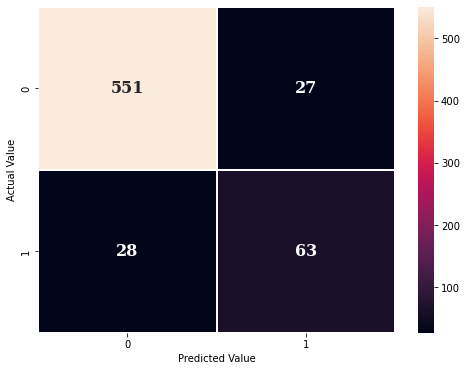

In [348]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test2,y_preds2), annot=True, fmt='0.0f', linewidths=2,
           annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [300]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       578
           1       0.70      0.69      0.70        91

    accuracy                           0.92       669
   macro avg       0.83      0.82      0.82       669
weighted avg       0.92      0.92      0.92       669



In [236]:
np.random.seed(100)

cat_clf2 = XGBClassifier()
cat_clf2.fit(X_train2, y_train2)
cat_clf2.score(X_test2,y_test2)

0.8968609865470852

In [237]:
y_preds2 = cat_clf2.predict(X_test2)

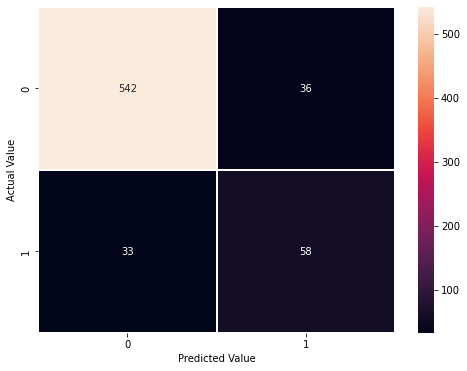

In [238]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test2,y_preds2), annot=True, fmt='0.0f', linewidths=2)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [239]:
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       578
           1       0.62      0.64      0.63        91

    accuracy                           0.90       669
   macro avg       0.78      0.79      0.78       669
weighted avg       0.90      0.90      0.90       669



### HyperParameter Tuning

In [341]:
#parameter yang akan diuji dengan fungsi RandomizedSearchCV()

param_rf = {"n_estimators": np.arange(50, 500, 50),
           "max_depth": np.arange(1, 20, 2),
           "criterion" : ['gini','entropy'],
           "min_samples_split": np.arange(1, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
param_xgb={
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth' : np.arange(1,20,2),
    'max_leaves': np.arange(1,20,2),
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

param_cat = {'depth'         : [4,5,6,7,8,9,10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : np.arange(10,110, 10)
                 }

In [344]:
np.random.seed(100)
cat_rs = RandomizedSearchCV(CatBoostClassifier(),
                          param_distributions=param_cat,
                          cv=5,
                          verbose=True)
cat_rs.fit(X_train2,y_train2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6763550	total: 12.1ms	remaining: 473ms
1:	learn: 0.6616108	total: 23.3ms	remaining: 443ms
2:	learn: 0.6479140	total: 35.1ms	remaining: 432ms
3:	learn: 0.6349018	total: 46.9ms	remaining: 422ms
4:	learn: 0.6212394	total: 58.6ms	remaining: 410ms
5:	learn: 0.6073964	total: 70.1ms	remaining: 397ms
6:	learn: 0.5940699	total: 81.9ms	remaining: 386ms
7:	learn: 0.5818415	total: 93.6ms	remaining: 375ms
8:	learn: 0.5706383	total: 105ms	remaining: 361ms
9:	learn: 0.5596786	total: 116ms	remaining: 348ms
10:	learn: 0.5505161	total: 128ms	remaining: 336ms
11:	learn: 0.5405721	total: 139ms	remaining: 324ms
12:	learn: 0.5308423	total: 150ms	remaining: 312ms
13:	learn: 0.5190769	total: 161ms	remaining: 299ms
14:	learn: 0.5106597	total: 173ms	remaining: 288ms
15:	learn: 0.5012878	total: 184ms	remaining: 275ms
16:	learn: 0.4927484	total: 195ms	remaining: 264ms
17:	learn: 0.4844988	total: 206ms	remaining: 252ms
18:	learn: 0.4775526	to

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000018D59CEABB0>,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04]},
                   verbose=True)

In [345]:
cat_rs.score(X_test2, y_test2)

0.8849028400597907

In [346]:
cat_rs.best_params_

{'learning_rate': 0.04, 'iterations': 80, 'depth': 9}

In [347]:
np.random.seed(100)
RF_HT = (reg_lambda = 0.5,
 reg_alpha = 0,
 n_estimators= 100,
 max_leaves= 19,
 max_depth = 15,
 learning_rate= 0.05,
 gamma= 1,
 booster= 'gbtree',
 base_score= 0.2)
RF_HT.fit(X_train2, y_train2)
RF_HT.score(X_test2, y_test2)

SyntaxError: invalid syntax (1142993157.py, line 2)

In [245]:
y_preds_HT = RF_HT.predict(X_test2)

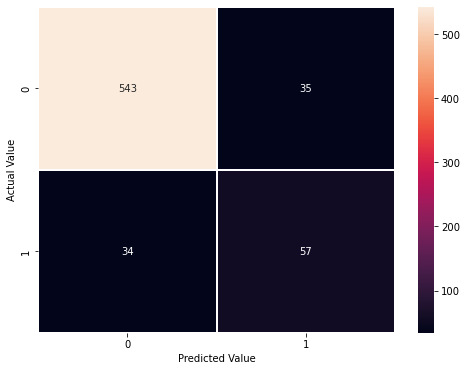

In [246]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test2,y_preds_HT), annot=True, fmt='0.0f', linewidths=2)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [247]:
print(classification_report(y_test2, y_preds_HT))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       578
           1       0.62      0.63      0.62        91

    accuracy                           0.90       669
   macro avg       0.78      0.78      0.78       669
weighted avg       0.90      0.90      0.90       669



### Feature Importances

In [312]:
clf2.feature_importances_

array([ 9.60795089,  2.7360762 ,  4.76045028,  2.72025297,  3.94624389,
        2.89434022,  4.64161056,  5.05703286,  7.89078568,  8.65902573,
        2.58490203, 17.11828429,  7.58608972,  6.9197023 ,  0.74408714,
        0.43490042,  1.20613195,  0.35299349,  2.67926335,  0.        ,
        0.        ,  0.75956131,  2.01688565,  2.3856111 ,  2.25711377,
        0.04070421,  0.        ])

In [313]:
feature_dict = dict(zip(X_train2.columns,clf2.feature_importances_ ))
feature_dict

{'Recency': 9.607950894680652,
 'MntFruits': 2.736076202426928,
 'MntMeatProducts': 4.760450281036525,
 'MntFishProducts': 2.7202529699451197,
 'MntSweetProducts': 3.946243885114786,
 'MntGoldProds': 2.894340218975423,
 'NumDealsPurchases': 4.641610555895598,
 'NumWebPurchases': 5.057032863954701,
 'NumStorePurchases': 7.890785675325524,
 'NumWebVisitsMonth': 8.65902572833302,
 'Umur': 2.584902027257149,
 'Total_Campaign': 17.118284291419975,
 'Join_Period': 7.586089717349519,
 'Jumlah_Anak': 6.919702302627351,
 'Education_2n Cycle': 0.7440871448499535,
 'Education_Basic': 0.4349004165867675,
 'Education_Graduation': 1.2061319507630237,
 'Education_Master': 0.3529934893956036,
 'Education_PhD': 2.6792633467182645,
 'Marital_Status_Absurd': 0.0,
 'Marital_Status_Alone': 0.0,
 'Marital_Status_Divorced': 0.7595613078075338,
 'Marital_Status_Married': 2.0168856513153286,
 'Marital_Status_Single': 2.3856110958766186,
 'Marital_Status_Together': 2.257113770281572,
 'Marital_Status_Widow': 0.

<Figure size 864x360 with 0 Axes>

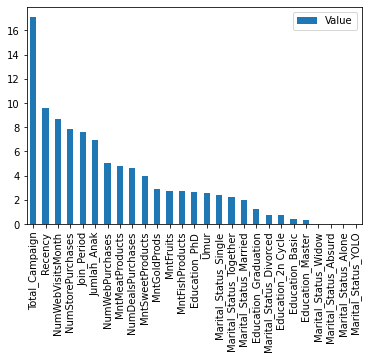

In [314]:
plt.figure(figsize=(12,5))
pd.DataFrame(feature_dict, index=['Value']).T.sort_values(by='Value', ascending=False).plot(kind='bar')
plt.show()

In [315]:
import shap
# Fits the explainer
explainer = shap.Explainer(clf2.predict, X_test2)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test2)

Permutation explainer: 670it [00:48, 10.73it/s]                         


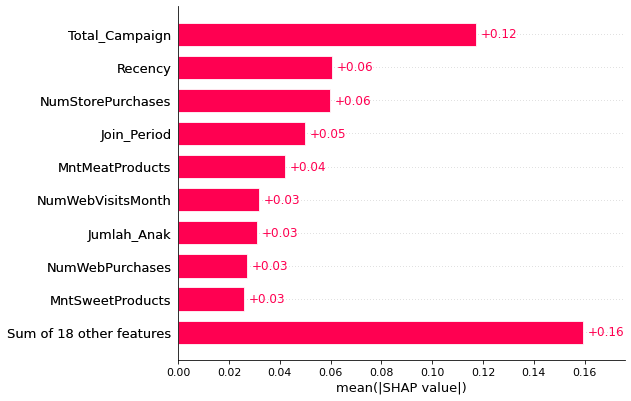

In [316]:
shap.plots.bar(shap_values)

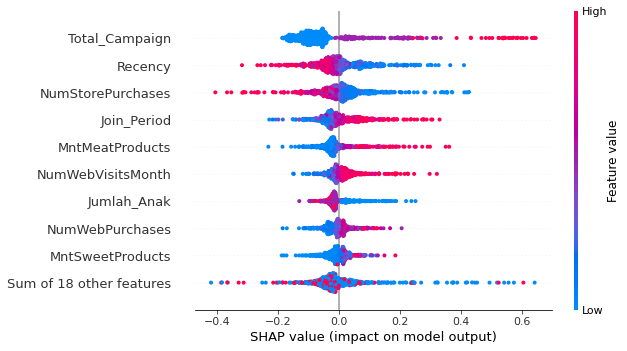

In [317]:
shap.plots.beeswarm(shap_values)

### ROC Curve

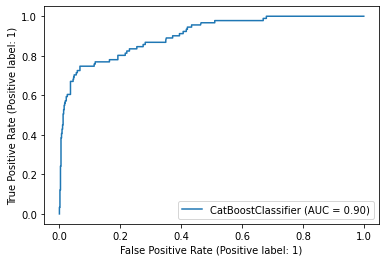

In [318]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf2, X_test2, y_test2)

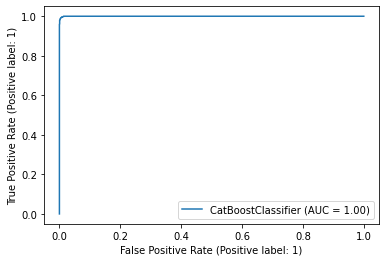

In [320]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf2, X_train2, y_train2);

### Cross Validation

In [321]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf2,
                         X_2,
                         y_2,
                         cv=5, # 5-fold cross-validation
                         scoring='roc_auc') # accuracy as scoring
print(cv_train)
print('nilai score rata rata: ', np.mean(cv_train))

Learning rate set to 0.013188
0:	learn: 0.6801152	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6667090	total: 6.16ms	remaining: 3.07s
2:	learn: 0.6569801	total: 9.11ms	remaining: 3.03s
3:	learn: 0.6462637	total: 12.1ms	remaining: 3.02s
4:	learn: 0.6368276	total: 15.2ms	remaining: 3.03s
5:	learn: 0.6271350	total: 18.3ms	remaining: 3.03s
6:	learn: 0.6178520	total: 21.3ms	remaining: 3.02s
7:	learn: 0.6087256	total: 24.5ms	remaining: 3.04s
8:	learn: 0.6010483	total: 27.4ms	remaining: 3.02s
9:	learn: 0.5911824	total: 30.3ms	remaining: 3s
10:	learn: 0.5833228	total: 33.4ms	remaining: 3s
11:	learn: 0.5725863	total: 36.6ms	remaining: 3.01s
12:	learn: 0.5635939	total: 39.7ms	remaining: 3.02s
13:	learn: 0.5565691	total: 42.9ms	remaining: 3.02s
14:	learn: 0.5491019	total: 46ms	remaining: 3.02s
15:	learn: 0.5427829	total: 49ms	remaining: 3.02s
16:	learn: 0.5361154	total: 52.1ms	remaining: 3.01s
17:	learn: 0.5295345	total: 55.2ms	remaining: 3.01s
18:	learn: 0.5232370	total: 58.3ms	remaining: 3.01s
19

In [322]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf2,
                         X_train2,
                         y_train2,
                         cv=5, # k-fold cross-validation
                         scoring='roc_auc') # accuracy as scoring
print(cv_train)
print('nilai train rata rata: ', np.mean(cv_train))

Learning rate set to 0.014162
0:	learn: 0.6818820	total: 4.37ms	remaining: 4.37s
1:	learn: 0.6716037	total: 8.5ms	remaining: 4.24s
2:	learn: 0.6627226	total: 12.8ms	remaining: 4.27s
3:	learn: 0.6539757	total: 17.5ms	remaining: 4.35s
4:	learn: 0.6464983	total: 22.3ms	remaining: 4.44s
5:	learn: 0.6391474	total: 26.7ms	remaining: 4.42s
6:	learn: 0.6292115	total: 31.3ms	remaining: 4.44s
7:	learn: 0.6216841	total: 35.6ms	remaining: 4.42s
8:	learn: 0.6130288	total: 40.3ms	remaining: 4.44s
9:	learn: 0.6055227	total: 45ms	remaining: 4.45s
10:	learn: 0.5982976	total: 49.6ms	remaining: 4.46s
11:	learn: 0.5917240	total: 54.1ms	remaining: 4.45s
12:	learn: 0.5850405	total: 58.5ms	remaining: 4.44s
13:	learn: 0.5784215	total: 63.1ms	remaining: 4.44s
14:	learn: 0.5723375	total: 67.6ms	remaining: 4.44s
15:	learn: 0.5654781	total: 72.2ms	remaining: 4.44s
16:	learn: 0.5590282	total: 76.8ms	remaining: 4.44s
17:	learn: 0.5526341	total: 81.2ms	remaining: 4.43s
18:	learn: 0.5474120	total: 85.8ms	remaining: 4

In [324]:
# Cross-validated accuracy score on Test Dataset
cv_test = cross_val_score(clf2,
                         X_test2,
                         y_test2,
                         cv=5, # k-fold cross-validation
                         scoring='roc_auc') # accuracy as scoring
print(cv_test)
print('nilai test rata rata : ',np.mean(cv_test))

Learning rate set to 0.007888
0:	learn: 0.6864925	total: 2.01ms	remaining: 2.01s
1:	learn: 0.6796898	total: 4.23ms	remaining: 2.11s
2:	learn: 0.6727396	total: 6.58ms	remaining: 2.19s
3:	learn: 0.6644122	total: 8.94ms	remaining: 2.23s
4:	learn: 0.6587094	total: 11.1ms	remaining: 2.21s
5:	learn: 0.6520540	total: 12.5ms	remaining: 2.08s
6:	learn: 0.6437648	total: 14.8ms	remaining: 2.1s
7:	learn: 0.6362651	total: 17.1ms	remaining: 2.12s
8:	learn: 0.6307135	total: 19.5ms	remaining: 2.15s
9:	learn: 0.6242212	total: 22ms	remaining: 2.18s
10:	learn: 0.6172939	total: 24.7ms	remaining: 2.22s
11:	learn: 0.6107455	total: 27.3ms	remaining: 2.25s
12:	learn: 0.6054422	total: 30ms	remaining: 2.28s
13:	learn: 0.5999057	total: 33.1ms	remaining: 2.33s
14:	learn: 0.5929554	total: 35.6ms	remaining: 2.34s
15:	learn: 0.5879793	total: 38.4ms	remaining: 2.36s
16:	learn: 0.5816178	total: 40.9ms	remaining: 2.37s
17:	learn: 0.5762751	total: 43.6ms	remaining: 2.38s
18:	learn: 0.5708688	total: 46.3ms	remaining: 2.3

In [256]:
validation = cross_validate(RF_HT, X_2, y_2, cv=5, scoring='roc_auc',return_train_score=True)

validation

{'fit_time': array([0.44152308, 0.35929155, 0.32958364, 0.32645297, 0.33517075,
        0.33023381, 0.31130695, 0.32973695, 0.34319949, 0.32804966]),
 'score_time': array([0.        , 0.01562357, 0.        , 0.        , 0.01562238,
        0.01562333, 0.01562119, 0.01562119, 0.        , 0.        ]),
 'test_score': array([0.91441021, 0.87301587, 0.92623716, 0.83442266, 0.87001595,
        0.90430622, 0.88444976, 0.89569378, 0.92328549, 0.90339907]),
 'train_score': array([0.99953595, 0.99958089, 0.99960141, 0.99947245, 0.99962101,
        0.99962296, 0.99970967, 0.99955963, 0.99948071, 0.99955891])}

## DATASET 3 using Featurewizz

In [257]:
from featurewiz import featurewiz, FeatureWiz

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [258]:
df_3 = df.copy()

In [259]:
df_3.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Umur Kelompok_Usia  \
0             0             0             0         1    58  Baby boomers   
1             0             0             0         0    61  Baby boomers   
2             0             0             0         0    50    Generasi X   
3             0             0             0         0    31    Generasi Y   
4             0             0             0         0    34    Generasi Y   

   Total_Campaign  Total_Purchase  Total_Spending  Join_Period  Jumlah_Anak  
0               0              25            1617           29            0  
1               0               6              27           11            2  
2               0              21             776           18            0  
3               0               8              53           12            1  
4               0              19             422           13            1

In [260]:
df_3 = pd.get_dummies(df_3)
df_3

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2235  61223.0        0         1       46       709         43   
2236  64014.0        2         1       56       406          0   
2237  56981.0        0         0       91       908         48   
2238  69245.0        0         1        8       428         30   
2239  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Umur  \
0                0             0             0         1    58   
1                0             0             0         0    61   
2                0             0             0         0    50   
3                0             0             0         0    31   
4                0             0             0         0    34   
...            ...           ...           ...       ...   ...   
2235             0             0             0         0    48   
2236             0             1             0         0    69   
2237             0             0             0         0    3

In [261]:
X_3 = df_3.drop('Response', axis=1)
y_3 = df_3['Response']

In [262]:
## Standarisasi data mengunakan RobustScaler()

scaler = StandardScaler()

## X_train dilakukan fit dan transform
X_3 = pd.DataFrame(
    scaler.fit_transform(X_3),
    columns = X_3.columns)

In [263]:
np.random.seed(100)
X_train3_norm, X_test3, y_train3_norm, y_test3 = train_test_split(X_3, y_3, test_size=0.3)

In [264]:
## Oversampling pada data train

np.random.seed(100)
X_train3, y_train3 = over_sampling.SMOTE().fit_resample(X_train3_norm, y_train3_norm)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (2634, 44)
    Some column names had special characters which were removed...
#### Singl

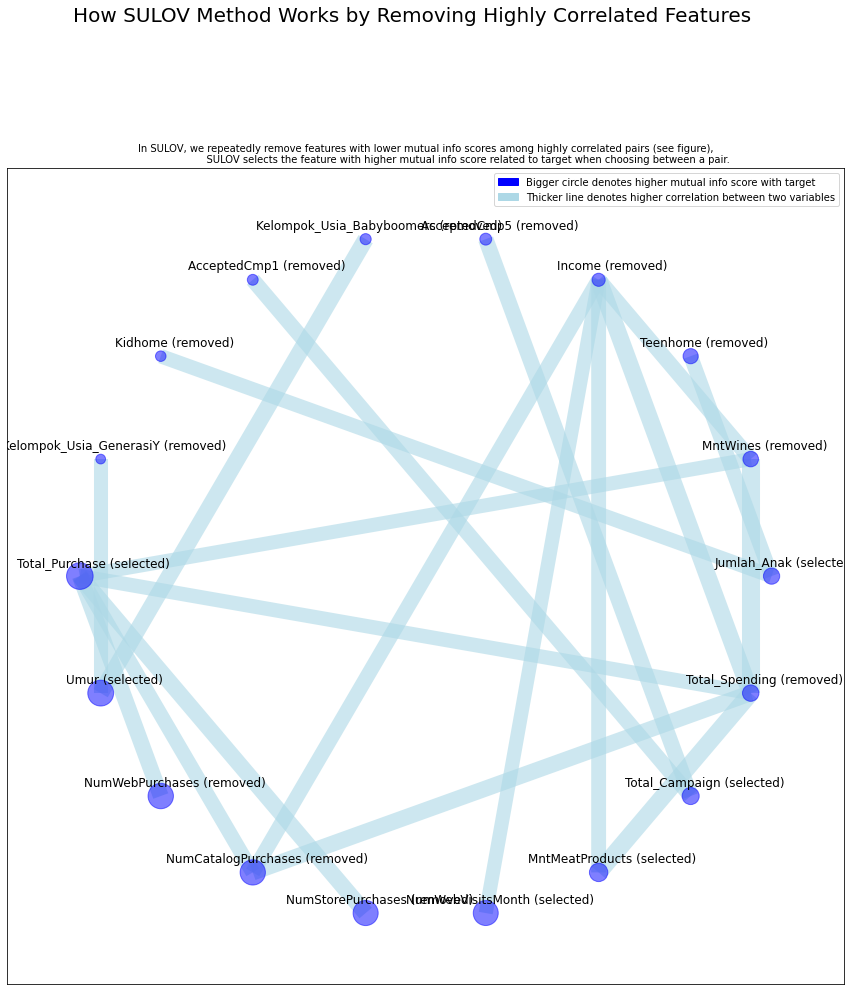

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 31
Finally 31 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 31 
    Taking top 10 features per iteration...
    XGBoost version using 1.7.3 as tree method: hist
Number of booster rounds = 100
        using 31 variables...
            selecting 13 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds
        using 25 variables...
            selecting 10 features in this iteration
            Time taken for regular XGBoost feature selection = 0 seconds


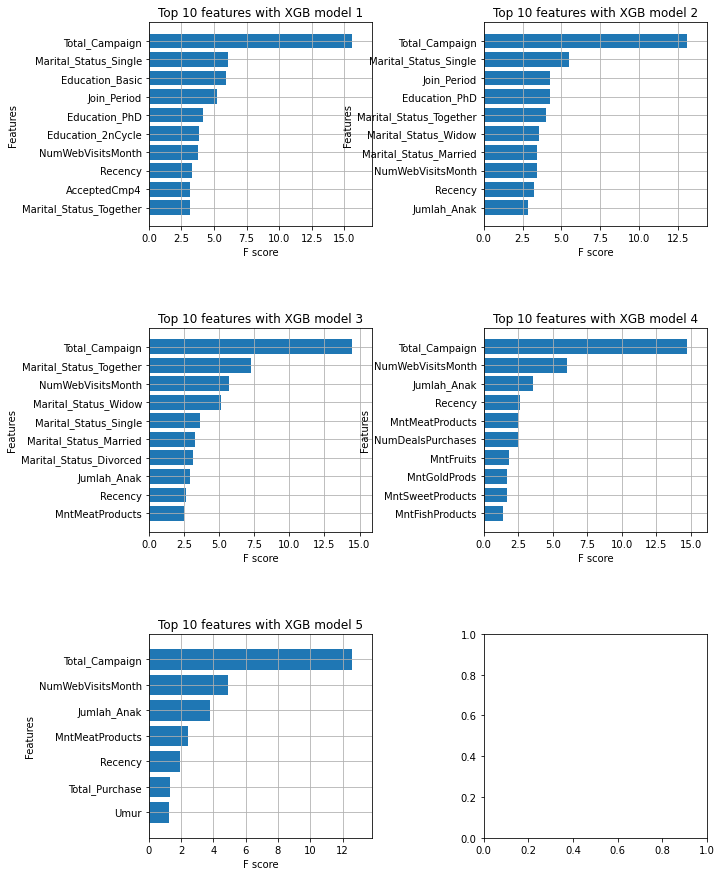

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 16 important features:
['Total_Campaign', 'Marital_Status_Single', 'Education_Basic', 'Join_Period', 'Education_PhD', 'Education_2nCycle', 'NumWebVisitsMonth', 'Recency', 'AcceptedCmp4', 'Marital_Status_Together', 'Marital_Status_Married', 'MntMeatProducts', 'Jumlah_Anak', 'Marital_Status_Widow', 'Marital_Status_Divorced', 'NumDealsPurchases']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 16 important features and a train dataframe
    Time taken to create entire pipeline = 3 second(s)


FeatureWiz(corr_limit=0.7)

In [265]:
### Feature Selection with FeatureWiz
features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = features.fit_transform(X_train3, y_train3)
X_test_selected = features.transform(X_test3)
features

In [266]:
## pemodelan yang akan diuji untuk mengetahui score
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree" : DecisionTreeClassifier(),
          "Adaboost Class" : AdaBoostClassifier(),
          "CatBoost Class" : CatBoostClassifier(),
          "XGB Class": XGBClassifier()}

# mealakukan pemodelan dengan melakukan fitting data dan model score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(100)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [267]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_selected,
                             X_test=X_test_selected,
                             y_train=y_train3,
                             y_test=y_test3)
model_scores

Learning rate set to 0.015579
0:	learn: 0.6836519	total: 4.21ms	remaining: 4.21s
1:	learn: 0.6757651	total: 8.04ms	remaining: 4.01s
2:	learn: 0.6664057	total: 11.9ms	remaining: 3.97s
3:	learn: 0.6564794	total: 15.5ms	remaining: 3.86s
4:	learn: 0.6464278	total: 19ms	remaining: 3.77s
5:	learn: 0.6378985	total: 22.6ms	remaining: 3.74s
6:	learn: 0.6309105	total: 26.2ms	remaining: 3.71s
7:	learn: 0.6227904	total: 29.7ms	remaining: 3.68s
8:	learn: 0.6150644	total: 33.3ms	remaining: 3.67s
9:	learn: 0.6079268	total: 36.9ms	remaining: 3.66s
10:	learn: 0.6006045	total: 40.6ms	remaining: 3.65s
11:	learn: 0.5934326	total: 44.1ms	remaining: 3.63s
12:	learn: 0.5870421	total: 47.6ms	remaining: 3.62s
13:	learn: 0.5820572	total: 51.3ms	remaining: 3.61s
14:	learn: 0.5752633	total: 54.6ms	remaining: 3.59s
15:	learn: 0.5689146	total: 58ms	remaining: 3.57s
16:	learn: 0.5627743	total: 61.6ms	remaining: 3.56s
17:	learn: 0.5577299	total: 65.1ms	remaining: 3.55s
18:	learn: 0.5531214	total: 68.8ms	remaining: 3.

{'KNN': 0.7698056801195815,
 'Logistic Regression': 0.8011958146487295,
 'Random Forest': 0.8789237668161435,
 'Decision Tree': 0.8086696562032885,
 'Adaboost Class': 0.8565022421524664,
 'CatBoost Class': 0.8893871449925261,
 'XGB Class': 0.8819133034379671}

In [330]:
np.random.seed(100)

clf3 = CatBoostClassifier()
clf3.fit(X_train_selected, y_train3)
clf3.score(X_test_selected, y_test3)

Learning rate set to 0.015579
0:	learn: 0.6836519	total: 4.39ms	remaining: 4.38s
1:	learn: 0.6757651	total: 8.54ms	remaining: 4.26s
2:	learn: 0.6664057	total: 12.5ms	remaining: 4.16s
3:	learn: 0.6564794	total: 16.4ms	remaining: 4.08s
4:	learn: 0.6464278	total: 20.3ms	remaining: 4.04s
5:	learn: 0.6378985	total: 24.5ms	remaining: 4.06s
6:	learn: 0.6309105	total: 28.3ms	remaining: 4.02s
7:	learn: 0.6227904	total: 32.1ms	remaining: 3.98s
8:	learn: 0.6150644	total: 36.1ms	remaining: 3.98s
9:	learn: 0.6079268	total: 40ms	remaining: 3.96s
10:	learn: 0.6006045	total: 44.1ms	remaining: 3.96s
11:	learn: 0.5934326	total: 48.2ms	remaining: 3.97s
12:	learn: 0.5870421	total: 52.2ms	remaining: 3.96s
13:	learn: 0.5820572	total: 56.2ms	remaining: 3.96s
14:	learn: 0.5752633	total: 60.2ms	remaining: 3.95s
15:	learn: 0.5689146	total: 64.3ms	remaining: 3.96s
16:	learn: 0.5627743	total: 68.6ms	remaining: 3.97s
17:	learn: 0.5577299	total: 72.5ms	remaining: 3.95s
18:	learn: 0.5531214	total: 76.5ms	remaining: 

0.8893871449925261

In [331]:
np.random.seed(100)
y_preds3 = clf3.predict(X_test_selected)

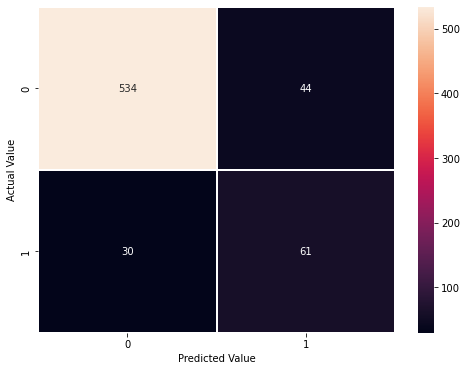

In [332]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test3,y_preds3), annot=True, fmt='0.0f', linewidths=2)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

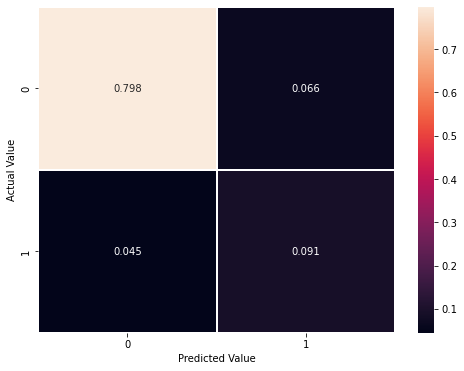

In [333]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test3,y_preds3)/669, annot=True, fmt='0.3f', linewidths=2)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [334]:
print(classification_report(y_test3, y_preds3))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       578
           1       0.58      0.67      0.62        91

    accuracy                           0.89       669
   macro avg       0.76      0.80      0.78       669
weighted avg       0.90      0.89      0.89       669



In [335]:
clf3.score(X_train_selected,y_train3)

0.9863325740318907

In [336]:
clf3.score(X_test_selected,y_test3)

0.8893871449925261

## ROC Curve

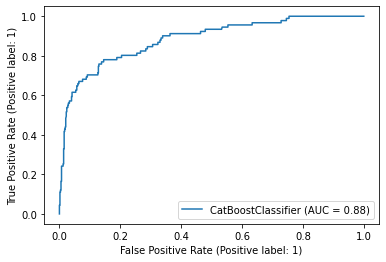

In [337]:
np.random.seed(100)
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf3, X_test_selected, y_test3);

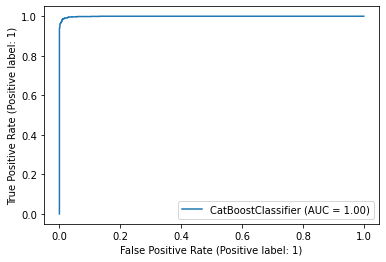

In [338]:
np.random.seed(100)
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf3, X_train_selected, y_train3);

## Cross Validation

In [339]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf3,
                         X_train_selected,
                         y_train3,
                         cv=5, # 5-fold cross-validation
                         scoring='roc_auc') # accuracy as scoring
print(cv_train)
print('nilai score rata rata: ', np.mean(cv_train))

Learning rate set to 0.014162
0:	learn: 0.6854423	total: 4.01ms	remaining: 4.01s
1:	learn: 0.6770658	total: 7.87ms	remaining: 3.92s
2:	learn: 0.6670094	total: 11.6ms	remaining: 3.84s
3:	learn: 0.6588554	total: 15.2ms	remaining: 3.79s
4:	learn: 0.6509427	total: 18.9ms	remaining: 3.77s
5:	learn: 0.6436765	total: 23ms	remaining: 3.8s
6:	learn: 0.6358942	total: 26.5ms	remaining: 3.76s
7:	learn: 0.6279171	total: 30.3ms	remaining: 3.75s
8:	learn: 0.6194360	total: 34.1ms	remaining: 3.75s
9:	learn: 0.6124776	total: 37.8ms	remaining: 3.75s
10:	learn: 0.6053499	total: 41.5ms	remaining: 3.73s
11:	learn: 0.5973614	total: 45.1ms	remaining: 3.72s
12:	learn: 0.5908005	total: 49.1ms	remaining: 3.73s
13:	learn: 0.5844988	total: 53ms	remaining: 3.73s
14:	learn: 0.5783358	total: 56.7ms	remaining: 3.72s
15:	learn: 0.5722101	total: 60.4ms	remaining: 3.71s
16:	learn: 0.5668045	total: 64ms	remaining: 3.7s
17:	learn: 0.5598123	total: 67.9ms	remaining: 3.7s
18:	learn: 0.5557592	total: 71.6ms	remaining: 3.7s
19

In [340]:
# Cross-validated accuracy score on Train dataset
cv_train = cross_val_score(clf3,
                         X_test_selected,
                         y_test3,
                         cv=5, # 5-fold cross-validation
                         scoring='roc_auc') # accuracy as scoring
print(cv_train)
print('nilai score rata rata: ', np.mean(cv_train))

Learning rate set to 0.007888
0:	learn: 0.6853361	total: 2.36ms	remaining: 2.36s
1:	learn: 0.6778432	total: 5.11ms	remaining: 2.55s
2:	learn: 0.6697875	total: 7.15ms	remaining: 2.38s
3:	learn: 0.6631498	total: 9.04ms	remaining: 2.25s
4:	learn: 0.6551567	total: 10.6ms	remaining: 2.11s
5:	learn: 0.6492466	total: 12.6ms	remaining: 2.08s
6:	learn: 0.6406105	total: 14.6ms	remaining: 2.07s
7:	learn: 0.6341402	total: 16.6ms	remaining: 2.06s
8:	learn: 0.6260723	total: 18.7ms	remaining: 2.06s
9:	learn: 0.6182105	total: 21.2ms	remaining: 2.1s
10:	learn: 0.6111536	total: 22.9ms	remaining: 2.06s
11:	learn: 0.6052967	total: 25.1ms	remaining: 2.07s
12:	learn: 0.5984042	total: 27.3ms	remaining: 2.07s
13:	learn: 0.5922578	total: 29.5ms	remaining: 2.07s
14:	learn: 0.5861209	total: 31.7ms	remaining: 2.08s
15:	learn: 0.5816977	total: 34ms	remaining: 2.09s
16:	learn: 0.5761794	total: 36.3ms	remaining: 2.1s
17:	learn: 0.5705847	total: 38.5ms	remaining: 2.1s
18:	learn: 0.5655766	total: 40.9ms	remaining: 2.1

## Hyper Paramater Tuning Process ( Pilihan Dataset ke - 3 )

In [279]:
### Membuat hyper parameter tuning parameter for RandomForestClassifier() pada dataset ke-2

In [280]:
#parameter yang akan diuji dengan fungsi RandomizedSearchCV()

param_rf = {"n_estimators": np.arange(50, 500, 50),
           "max_depth": np.arange(1, 20, 2),
           "criterion" : ['gini','entropy'],
           "min_samples_split": np.arange(1, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

param_xgb={
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': [0.01,0.05,0.1],
    'max_depth' : np.arange(1,20,2),
    'max_leaves': np.arange(1,20,2),
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1] }

param_catboost={
    
}

In [281]:
# menguji parameter dengan fungsi RandomizedSearchCV()

np.random.seed(100)

# melakukan setting random hyperparameter search for RandomForestClassifier
rf_random = RandomizedSearchCV(clf3,
                                param_distributions=param_rf,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rf_random.fit(X_train_selected, y_train3)
rf_random.score(X_test_selected, y_test3)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8923766816143498

In [282]:
# Hyper parameter terbaik dari proses RandomizedSearchCV()
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 17,
 'criterion': 'entropy'}

In [283]:
np.random.seed(100)
rf_random.score(X_test_selected, y_test3)

0.8923766816143498

In [284]:
## RandomForest tanpa hyper parameter tuning
np.random.seed(100)
clf_HT = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 3,
 min_samples_leaf= 3,
 max_depth= 17,
 criterion = 'entropy')
clf_HT.fit(X_train_selected, y_train3)
clf_HT.score(X_test_selected,y_test3)

0.8923766816143498

In [285]:
y_preds_cv = clf_HT.predict(X_test_selected)

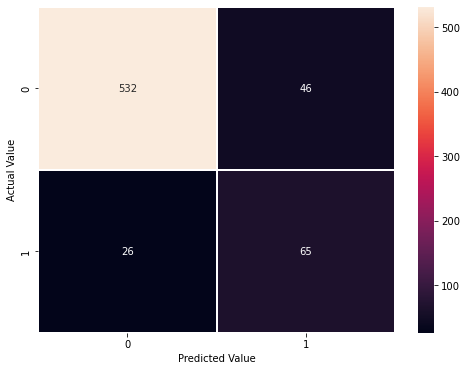

In [286]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test3,y_preds_cv), annot=True, fmt='0.0f', linewidths=2)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

In [287]:
print(classification_report(y_test3, y_preds_cv))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       578
           1       0.59      0.71      0.64        91

    accuracy                           0.89       669
   macro avg       0.77      0.82      0.79       669
weighted avg       0.90      0.89      0.90       669



##### Hasil perbandingan tanpa hyperparamater tuning

In [288]:
np.random.seed(100)
clf3 = RandomForestClassifier()
clf3.fit(X_train_selected, y_train3)
clf3.score(X_test_selected,y_test3)

0.8789237668161435

In [289]:
y_preds3 = clf3.predict(X_test_selected)

In [290]:
confusion_matrix(y_test3, y_preds3 )

array([[528,  50],
       [ 31,  60]], dtype=int64)

In [291]:
print(classification_report(y_test3, y_preds3))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       578
           1       0.55      0.66      0.60        91

    accuracy                           0.88       669
   macro avg       0.74      0.79      0.76       669
weighted avg       0.89      0.88      0.88       669



### Feature Importances pada Dataset ke-3 setelah Modelling

In [292]:
clf_HT.feature_importances_

array([0.14564706, 0.0414594 , 0.00161203, 0.13390172, 0.03597958,
       0.00841109, 0.12228511, 0.13917088, 0.01347795, 0.03038914,
       0.03368122, 0.14051551, 0.07750204, 0.00271104, 0.01001007,
       0.06324615])

In [293]:
# Match coef's of features to columns
feature_dict = dict(zip(X_train_selected.columns, list(clf_HT.feature_importances_)))
feature_dict

{'Total_Campaign': 0.14564706090416105,
 'Marital_Status_Single': 0.04145939503968295,
 'Education_Basic': 0.0016120333276337681,
 'Join_Period': 0.13390171938212128,
 'Education_PhD': 0.03597958103793137,
 'Education_2n Cycle': 0.008411090409261836,
 'NumWebVisitsMonth': 0.12228511006206162,
 'Recency': 0.13917088295528451,
 'AcceptedCmp4': 0.013477950527794427,
 'Marital_Status_Together': 0.030389139733303795,
 'Marital_Status_Married': 0.03368122145646257,
 'MntMeatProducts': 0.14051551277595958,
 'Jumlah_Anak': 0.0775020415571418,
 'Marital_Status_Widow': 0.002711043602664053,
 'Marital_Status_Divorced': 0.01001006889786073,
 'NumDealsPurchases': 0.06324614833067473}

In [294]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df = feature_df.T

In [295]:
feature_df.columns = ['Value']

<Figure size 2000x1000 with 0 Axes>

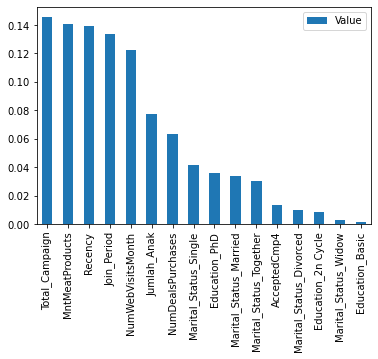

In [296]:
plt.figure(figsize=(20,10), dpi=100)
feature_df.sort_values(by='Value', ascending=False).plot(kind='bar')
plt.show()

* dari grafik feature importances dari model RandomForestClassifier diatas diketahu feature mana yang memiliki peranan penting dalam menentukan prediction pada model yang telah dibuat, dalam hal ini dalam 5 kategori feature penting adalah :
 1. Total campaign
 2. MntMeatProducts
 3. Recency
 4. Join_Period
 5. NumWebVisitsMonth

### Features Importances dari Model menggunakan SHAP VALUE

In [ ]:
#!pip install shap

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(clf_HT.predict, X_test_selected)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_selected)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.bar(shap_values)

* dari grafik shap value diatas diketahu feature mana yang memiliki peranan penting dalam menentukan prediction pada model yang telah dibuat, dalam hal ini dalam 5 kategori feature penting adalah :
 1. Total campaign
 2. Recency
 3. Join_Period
 4. Jumlah_Anak
 5. MntMeatProducts
 
* dari feature penting diatas selanjutnya dapat dilakukan langkah langkah strategi bisnis apa yang dapat dilakukan untuk meningkatkan response rate dari campaign marketing yang telah dilakukan

## MODELLING WITH CLUSTERING METHOD (EXTRA STAGE 3)

In [ ]:
df1 = pd.read_csv('marketing_campaign.csv', sep=';')
df1.head()

## Clustering berdasarkan RFM analysis yaitu faktor Recency, Frequency dan Monetary Value

### a. Create New Column : Monetary and Frequency

In [ ]:
df1['Monetary'] = df1['MntWines'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']
df1['Frequency_1'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases'] + df1['NumWebVisitsMonth']
df1['Frequency_2'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

### b. Drop Unused Column

In [ ]:
#drop unused column, select frequency_1 when numberwebvisitsmonth is included
df2_1 = df1[['Frequency_1', 'Monetary', 'Recency','ID']]
df2_1 = df2_1.set_index(['ID'])
df2_1.head()

In [ ]:
df2_1.info()

In [ ]:
df2_1.describe()

### c. Imputation

In [ ]:
#checking null value
df2_1.isnull().sum()

***Cause there's no null value, we don't need to do any imputation to RFM data***

### d. Handling Outliers with Z-Score

In [ ]:
# Handling Outlier with Z-Score

#Import library
import numpy as np
import scipy.stats as stats

# Outlier umur dibuang karena dianggap tidak memiliki dampak yang signifikan jika outliernya dibuang

z_scores = np.abs(stats.zscore(df2_1))
filtered_entries = (z_scores < 3)
df2_1_zscore = df2_1[filtered_entries]

df2_1_zscore.describe()

# Terdapat 3 outlier yang dibuang berdasarkan kolom umur

In [ ]:
df2_1_zscore.shape

***Since there's no outlier in data based on z_score test, there's no data discarded***

In [ ]:
df2_1_zscore.isna().sum()

In [ ]:
df2_1_zscore= df2_1_zscore.fillna(df2_1_zscore.median())

In [ ]:
df2_1_zscore.isna().sum()

### e. Handling Outlier with IQR

In [ ]:
import numpy as np
df2_1iqr = df2_1.fillna(0)
Q1 = df2_1iqr.quantile(0.25)
Q3 = df2_1iqr.quantile(0.75)
JAK = Q3 - Q1
df2_1iqr= df2_1iqr[~((df2_1iqr< (Q1 - 1.5 * JAK)) |(df2_1iqr> (Q3 + 1.5 * JAK))).any(axis=1)]
df2_1iqr.head()

In [ ]:
df2_1iqr.shape

## 3. Preeliminary Data Visualisation/Exploration

## 4. Feature Engineering

#### a. Standardization(if needed)
#### b. Convert Numpy to Array

In [ ]:
#Standardize the data

from sklearn.preprocessing import StandardScaler

def standardizer(df2_1_zscore):
    data_columns = df2_1_zscore.columns
    data_index = df2_1_zscore.index
    normalize = StandardScaler()
    normalize.fit(df2_1_zscore)
    
    normalize_x = pd.DataFrame(normalize.transform(df2_1_zscore))
    normalize_x.columns = data_columns
    return normalize_x, normalize

X_normalized, normalize = standardizer(df2_1_zscore)
X_normalized.head()

In [ ]:
X_normalized.shape

### b. Convert Numpy to Array

In [ ]:
X_clust = df2_1_zscore
X_clust["Frequency_1"] = pd.to_numeric(X_clust["Frequency_1"])
X_clust["Monetary"] = pd.to_numeric(X_clust["Monetary"])
X_clust["Recency"] = pd.to_numeric(X_clust["Recency"])



In [ ]:
print(X_clust.isna().sum())

In [ ]:
num_data = X_clust.iloc[:, :]

# mengubahnya menjadi array
num_array = np.array(num_data)
print(num_array)

In [ ]:
num_data.isnull().sum()

# 5. Clustering

#### a. Elbow Method
#### b. Silhoutte Analysis
#### c. Create Final Cluster
#### d. Visualize and Evaluate

## a. Elbow Method

In [ ]:
#Elbow Method 

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(num_data)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(num_data)
    nilai_sse = 0
    
    for i in range(len(num_data)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += ((num_data.iloc[i, 0] - titik_pusat[0]) ** 2 + (num_data.iloc[i, 1] - titik_pusat[1]) ** 2 + (num_data.iloc[i, 2] - titik_pusat[2]) ** 2)
    
    sse.append(nilai_sse)
    k_list.append(k)

plt.figure(figsize=(20,10))
plt.plot(k_list,sse)
plt.xticks(np.arange(0, 11, 1.0))
plt.show()

In [ ]:
!pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=3), num_data, k=(1,10))

## b. Silhoutte Analysis

In [ ]:
# Silhoutte Analysis

from sklearn.metrics import silhouette_score

daftar = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(num_data)
    labels = kmeans.labels_
    daftar.append(silhouette_score(num_data, labels, metric = 'euclidean'))
    k_list.append(k)

plt.figure(figsize=(20,10))
plt.plot(k_list,daftar)
plt.show()

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

# Use the quick method and immediately show the figure

for i in [3, 4, 5]:
    silhouette_visualizer(KMeans(i, random_state=42), num_data, colors='yellowbrick')

## c. Create Final CLuster

In [ ]:
# create final cluster
km = KMeans(
    n_clusters=3,
    random_state=42
)
kmeans = km.fit(num_data)
df2_1_zscore['Cluster'] = kmeans.labels_
df2_1_zscore.head()

## d. Visualize and Evaluate

In [ ]:
def plot_clusters(rfm):
        fig = plt.figure(figsize=(18,12))
        dx = fig.add_subplot(111, projection='3d')
        colors = ['green', 'blue', 'red', 'yellow']

        for i in range(0,len(rfm['Cluster'].unique())):
            dx.scatter(rfm[rfm.Cluster == i].Recency, 
                       rfm[rfm.Cluster == i].Frequency_1, 
                       rfm[rfm.Cluster == i].Monetary, 
                       c = colors[i], 
                       label = 'Cluster ' + str(i), 
                       s=10, alpha=1.0)
        dx.set_xlabel('Recency', fontsize=14)
        dx.set_ylabel('Frequency', fontsize=14)
        dx.set_zlabel('Monetary', fontsize=14)
        dx.legend(fontsize=12)
        dx.grid(True)

        # Save Figure
        ##plt.savefig(folder_result+'cluster_3d.png')

        # Show Figure
        plt.show()

In [ ]:
plot_clusters(df2_1_zscore)

## Merge the cluster data with response data

In [ ]:
df2_1_zscore

In [ ]:
df_rfm = df2_1_zscore
df_response = df1[['ID', 'Response']]

df_rfm_response = pd.merge(df_rfm, df_response, left_on='ID', right_on='ID')

df_rfm_response.head()

In [ ]:
# Add the response column to your original dataframe

print('RFM Average for Each Segment')
# Group the data by cluster and aggregate the count, mean Recency, mean Frequency, mean Monetary, and sum of Responses
grouped = df_rfm_response.groupby('Cluster').agg({'Cluster': 'size', 'Recency': 'mean', 'Frequency_1': 'mean', 'Monetary': 'mean', 'Response': 'sum'})

# Rename the "Cluster" column to "Counts"
grouped.rename(columns={'Cluster': 'Counts'}, inplace=True)

# Compute the response rate column
grouped['Response_Rate'] = grouped['Response'] / grouped['Counts']

# Print the updated dataframe
print(grouped)



In [ ]:
Importancy = [] #membuat list kosong
for i, k in grouped.iterrows(): #iterasi setiap row
    if i == 0:
        cluster_name = 'Potential'
    elif i == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low'
    Importancy.append(cluster_name)
    
grouped['cluster'] = Importancy

In [ ]:
grouped

## Kesimpulan

- Metode K-Means Clustering dengan memanfaatkan RFM feature menghasilkan best cluster = 3
- Berdasarkan statistik dari masing-masing segmen/cluster menunjukkan bahwa terbaik (sekaligus minoritas) adalah segmen 1 (dari segi Monetary), setelah dicek, response rate mereka terhadap campaign yang dilakukan adalah yang paling tinggi. Sedangkan Cluster 0 merupakan Cluster di urutan 2 terbaik dan kita labeli sebagai potential (dilihat dari Frequency Visit dan Monetary). Segmen terburuk adalah segmen 2 (berdasarkan frequency dan monetary) dan response rate-nya pun paling rendah
- Hasil segmentasi tersebut dapat digunakan untuk menetapkan skala prioritas dalam campaign selanjutnya . Segmen Important perlu mendapat perhatian khusus karena berpotensi meningkatkan revenue perusahaan, disusul segmen Potential. Untuk segmen dengan prospek Low, campaign tetap bisa dilaksanakan namun tetap memperhatikan efektivitas dan efisiensi (salah satunya dengan melakukan prediksi melalui promo redemption model).